In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random
import missingno as msno
#from google.colab import data_table
from tabulate import tabulate
import scipy.stats as st
import matplotlib.patches as mpl_patches
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import describe
import matplotlib.cm as cm
import matplotlib.lines as mlines
from pandas.core.window.rolling import Rolling
import pandas_ta as ta

In [3]:
final_df = pd.read_csv('./final_data_imputed_20_01_2024.csv')
final_df

Date  opening_price  highest_price  lowest_price  closing_price  \
0     2013-01-02          13.24          13.24         12.77          13.22   
1     2013-01-03          13.12          13.19         12.98          13.09   
2     2013-01-04          13.09          13.26         12.96          13.19   
3     2013-01-05          13.12          13.24         12.84          13.19   
4     2013-01-06          13.19          13.19         13.03          13.15   
...          ...            ...            ...           ...            ...   
4027  2024-01-15       41700.91       43332.79      41682.62       42492.35   
4028  2024-01-16       42483.97       43569.31      42033.30       43131.47   
4029  2024-01-17       43132.80       43185.47      42164.99       42741.63   
4030  2024-01-18       42740.17       42879.39      40605.54       41292.17   
4031  2024-01-19       41289.50       42160.16      40244.67       41629.02   

      transactions_in_blockchain  avg_block_size  sent_by_adress  \
0                          39280          114077           31809   
1                          42147          108023           38197   
2                          48436          141811           34990   
3                          39455          118240           38008   
4                          32881          100608           30021   
...                          ...             ...             ...   
4027                      408385          754220          375303   
4028                      469997          752060          391211   
4029                      449294          747345          441886   
4030                      483875          739462          449416   
4031                      460631          775060          376114   

      avg_mining_difficulty  avg_hashrate  ...  avg_transaction_value  \
0                   2979637  2.280465e+13  ...                650.617   
1                   2979637  2.372489e+13  ...                542.730   
2                   2979637  2.260818e+13  ...                632.431   
3                   2979637  2.259070e+13  ...                697.556   
4                   2979637  2.076659e+13  ...                436.105   
...                     ...           ...  ...                    ...   
4027         73197634206448  4.427672e+20  ...              73720.000   
4028         73197634206448  4.766308e+20  ...              84100.000   
4029         73197634206448  4.007983e+20  ...             115218.000   
4030         73197634206448  4.756212e+20  ...              99128.000   
4031         73197634206448  5.322092e+20  ...              84502.000   

      median_transaction_value         tweets  google_trends  \
0                       14.514    8193.000000       1.497000   
1                       19.732    8193.000000       1.798000   
2                       11.384    8193.000000       1.841000   
3                       13.945    8193.000000       1.826000   
4                       17.618    8193.000000       2.187000   
...                        ...            ...            ...   
4027                    30.199  203592.746000      10.443000   
4028                     0.234  203645.994121       9.137000   
4029                    56.659  203693.132959       8.050000   
4030                    87.060  203732.860584       8.920000   
4031                    85.141  203763.519531       9.704211   

      active_addresses   top100_to_total_percentage  avg_fee_to_reward  \
0              43104.0  Axes(0.125,0.11;0.775x0.77)              0.835   
1              51268.0  Axes(0.125,0.11;0.775x0.77)              0.925   
2              47341.0  Axes(0.125,0.11;0.775x0.77)              1.000   
3              53417.0  Axes(0.125,0.11;0.775x0.77)              0.885   
4              42211.0  Axes(0.125,0.11;0.775x0.77)              0.957   
...                ...                          ...                ...   
4027          658906.0  Axes(0.125,0.11;0.775x0.77)             14.149   
4028    

In [4]:
def feature_smoothening(df,feature_name,smoothening_type,smoothening_range=[7,30,90],show_plot=False,show_original_Feature_in_plot=True):
    if smoothening_type == 'sma':
        for j in smoothening_range:
            df[f'{smoothening_type}{j} {feature_name}'] = ta.sma(df[feature_name],j) 

    elif smoothening_type == 'var':
        for j in smoothening_range:
            df[f'{smoothening_type}{j} {feature_name}'] = ta.variance(df[feature_name],j)

    elif smoothening_type == 'stdev':
        for j in smoothening_range:
            df[f'{smoothening_type}{j} {feature_name}'] = ta.stdev(df[feature_name],j)
    
    elif smoothening_type == 'ema':
        for j in smoothening_range:
            df[f'{smoothening_type}{j} {feature_name}'] = ta.ema(df[feature_name],j)

    elif smoothening_type == 'wma':
        for j in smoothening_range:
            df[f'{smoothening_type}{j} {feature_name}'] = ta.wma(df[feature_name],j)

    elif smoothening_type == 'rsi':
        for j in smoothening_range:
             df[f'{smoothening_type}{j} {feature_name}'] = ta.rsi(df[feature_name],j)

    elif smoothening_type == 'roc':
        for j in smoothening_range:
            df[f'{smoothening_type}{j} {feature_name}'] = ta.roc(df[feature_name],j)  

    elif smoothening_type == 'dema':
        for j in smoothening_range:
            df[f'{smoothening_type}{j} {feature_name}'] = ta.dema(df[feature_name],j) 

    elif smoothening_type == 'tema':
        for j in smoothening_range:
            df[f'{smoothening_type}{j} {feature_name}'] = ta.tema(df[feature_name],j) 

    elif smoothening_type == 'bband_lower':
        for j in smoothening_range:
            bband_df = ta.bbands(df[feature_name],j)
            df[f'{smoothening_type}{j} {feature_name}'] = bband_df[f'BBL_{j}_2.0']

    elif smoothening_type == 'bband_upper':
        for j in smoothening_range:
            bband_df = ta.bbands(df[feature_name],j)
            df[f'{smoothening_type}{j} {feature_name}'] = bband_df[f'BBU_{j}_2.0']

    elif smoothening_type == 'macd':
        macd_df = ta.macd(df[feature_name])
        df[f'{smoothening_type} hist {feature_name}'] = macd_df['MACDh_12_26_9']
        df[f'{smoothening_type} signal {feature_name}'] = macd_df['MACDs_12_26_9']
        df[f'{smoothening_type} {feature_name}'] = macd_df['MACD_12_26_9']

    
    if show_plot == True and show_original_Feature_in_plot==True :
        df[[feature_name]+[i for i in list(df.columns) if i.split(" ")[-1] == feature_name and i.split(" ")[0][0:len(smoothening_type)] == smoothening_type]].plot(kind='line',figsize=(25,5))
        plt.grid()
        plt.title(f'Feature Smoothening-{feature_name} by {smoothening_type}')
        plt.xticks([])
        plt.show()

    elif show_plot == True and show_original_Feature_in_plot==False :
        df[[i for i in list(df.columns) if i.split(" ")[-1] == feature_name and i.split(" ")[0][0:len(smoothening_type)] == smoothening_type]].plot(kind='line',figsize=(25,5))
        plt.grid()
        plt.title(f'Feature Smoothening-{feature_name} by {smoothening_type}')
        plt.xticks([])
        plt.show()

In [5]:
feature_list = [i for i in list(final_df.columns) if i not in ['Date','next_day_closing_price']]

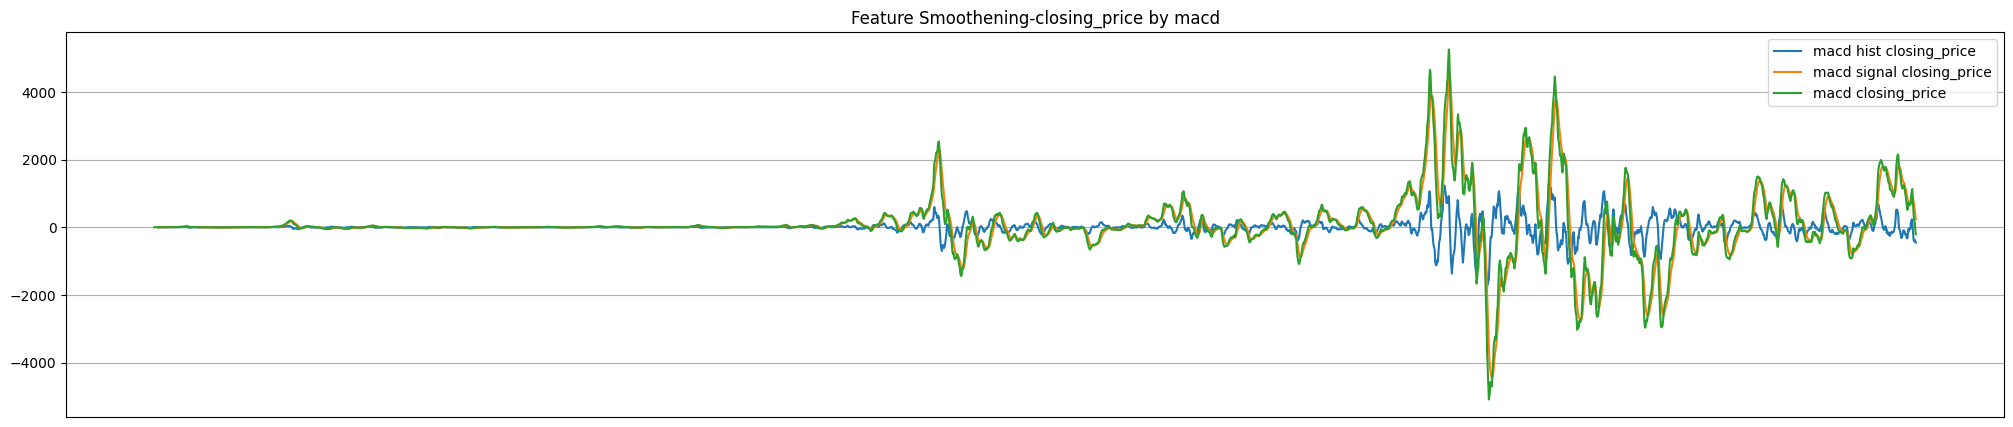

In [8]:
feature_smoothening(final_df,'closing_price','macd',show_plot=True,show_original_Feature_in_plot=False)

Simple Moving Average
- A simple moving average (SMA) calculates the average of a selected range of feature values for a number of periods in that range.
- It determines if an asset price will continue or if it will reverse a bull or bear trend.

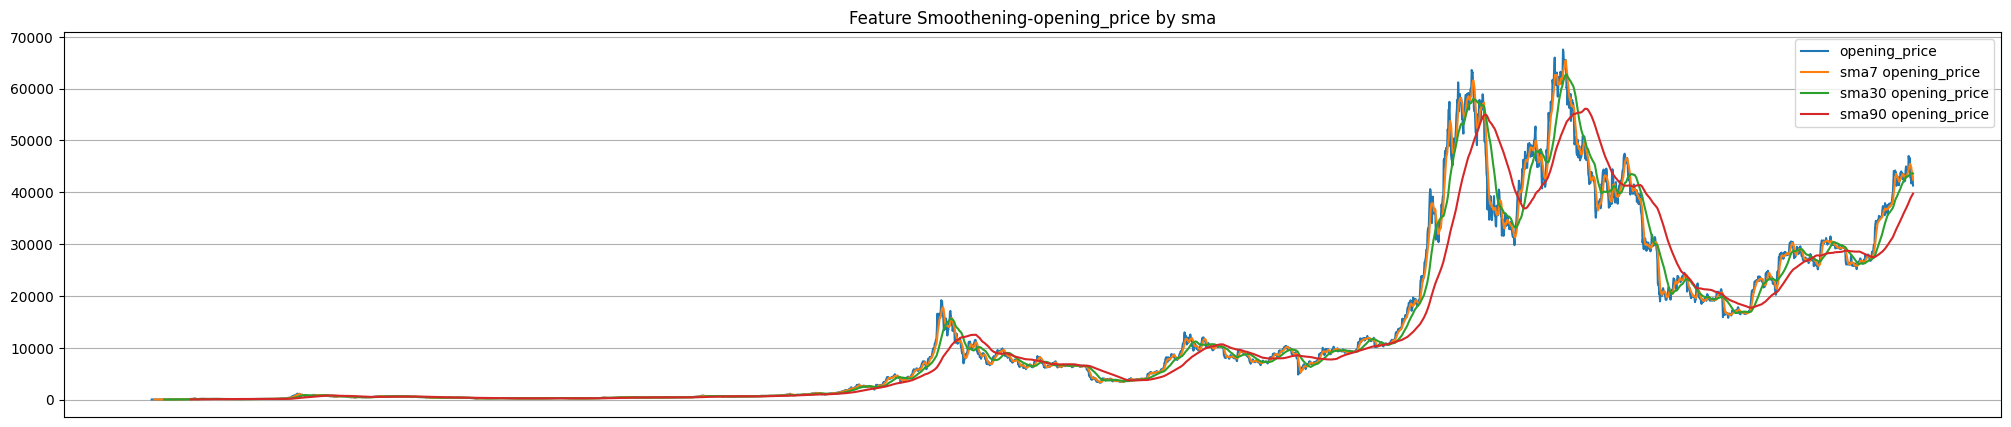

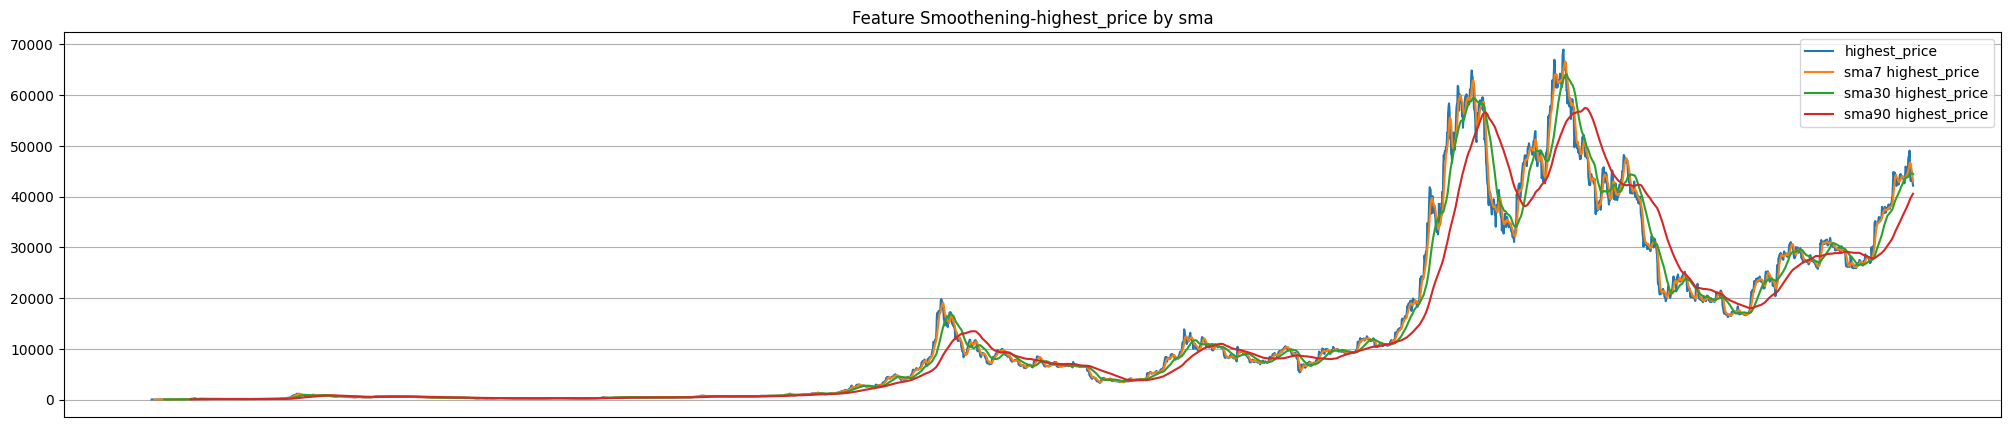

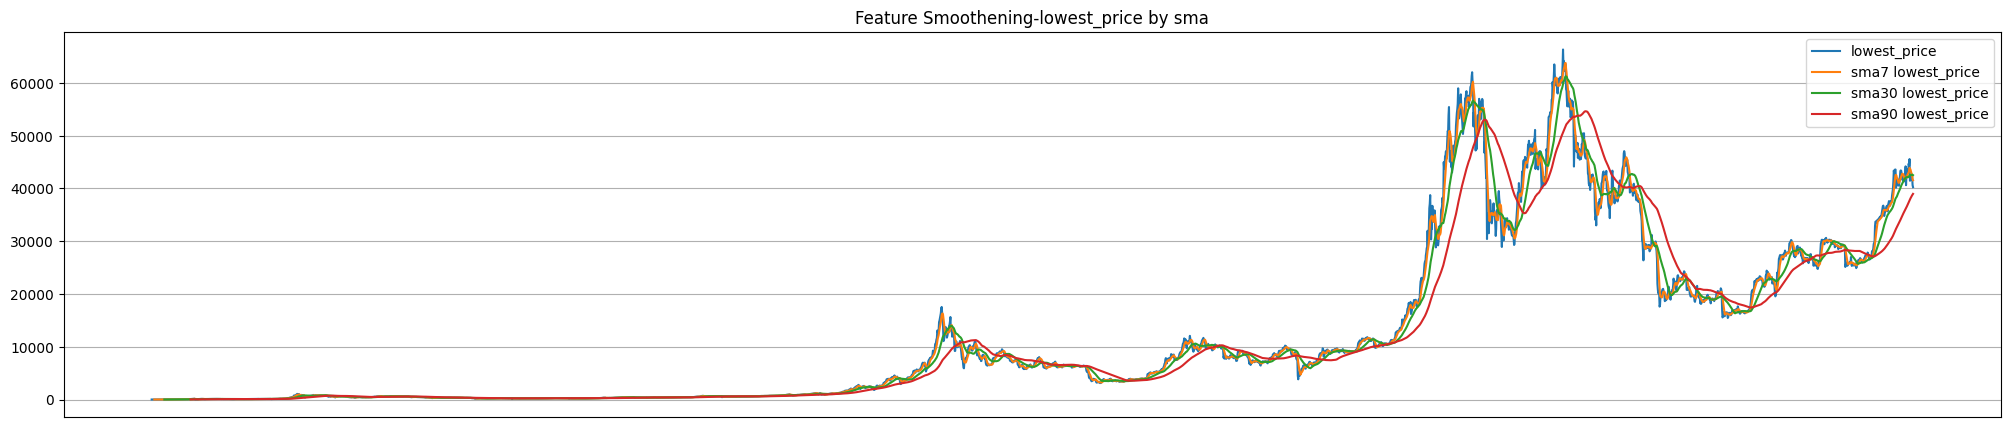

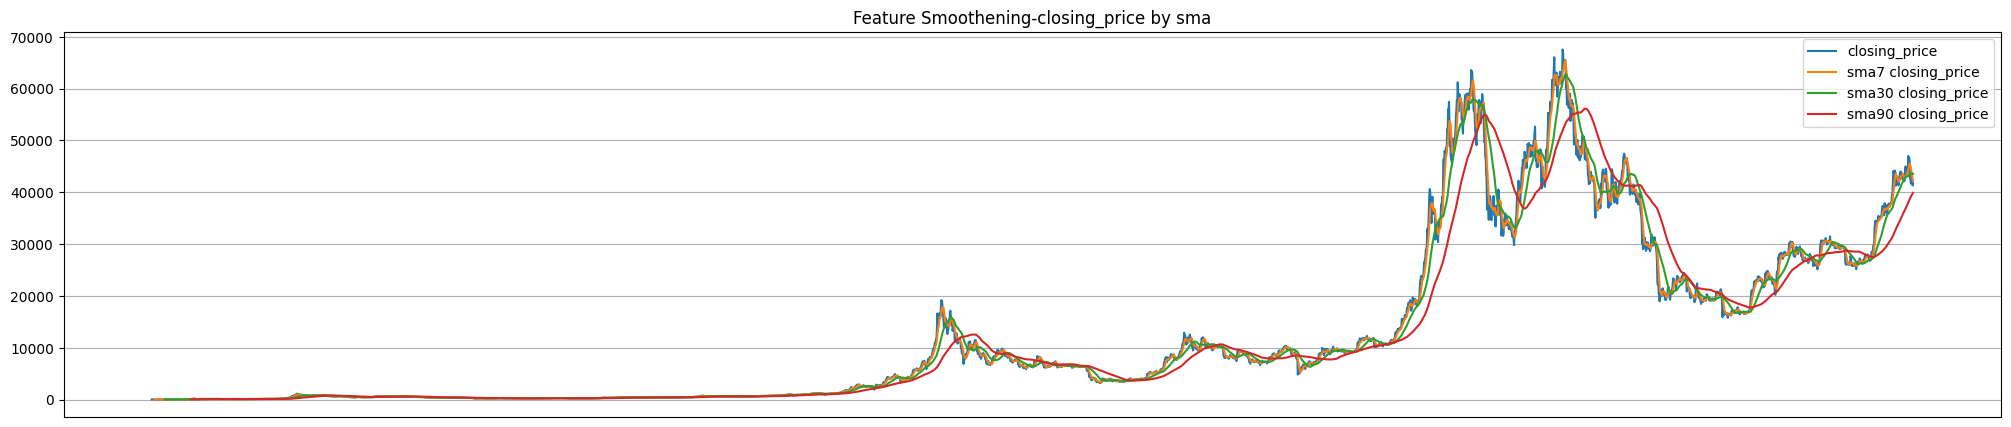

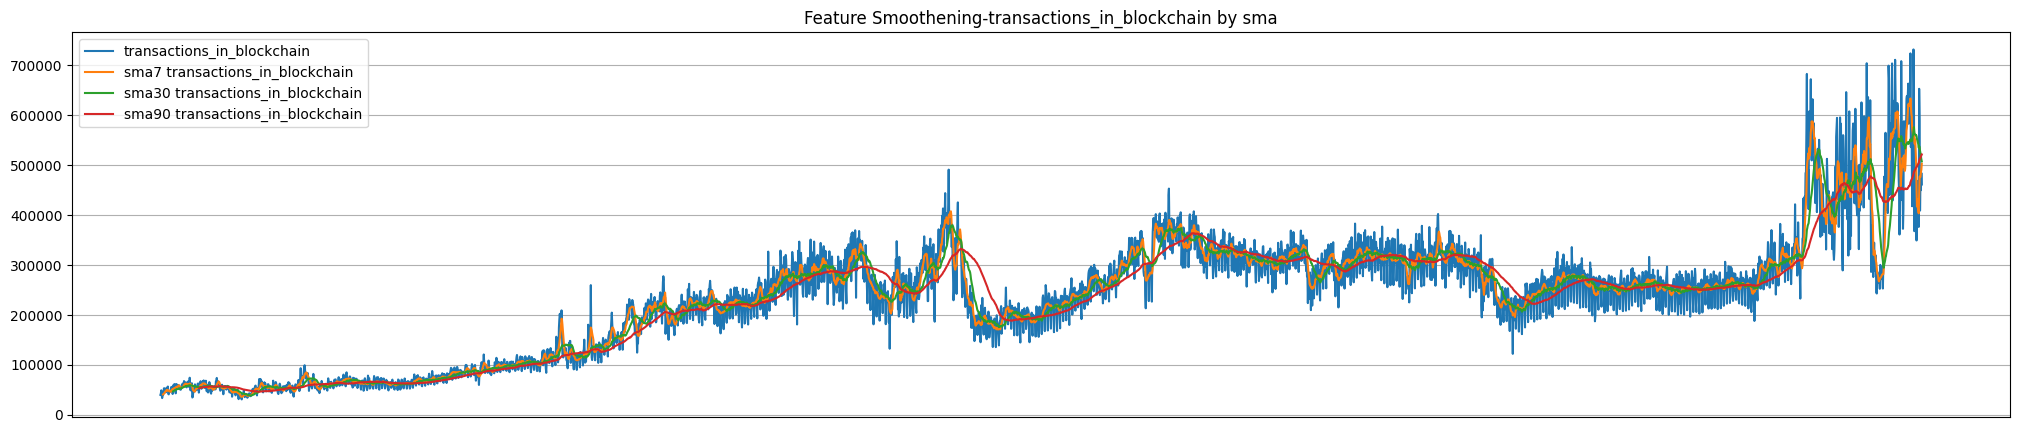

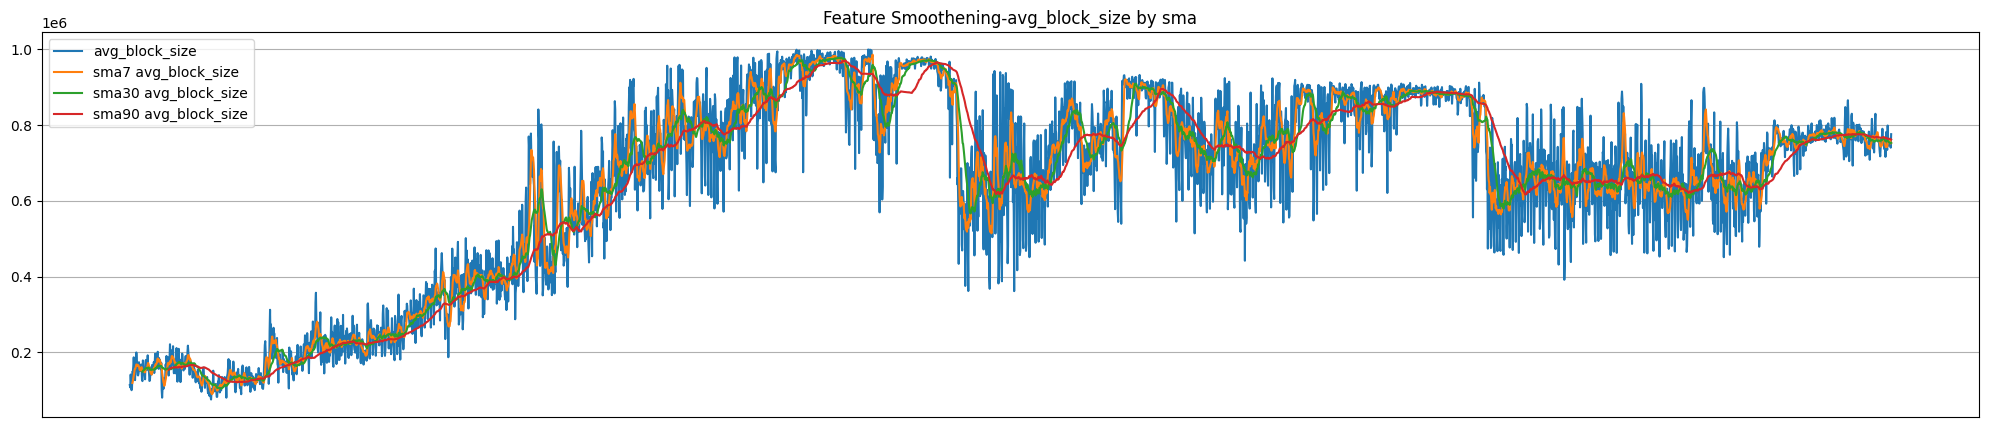

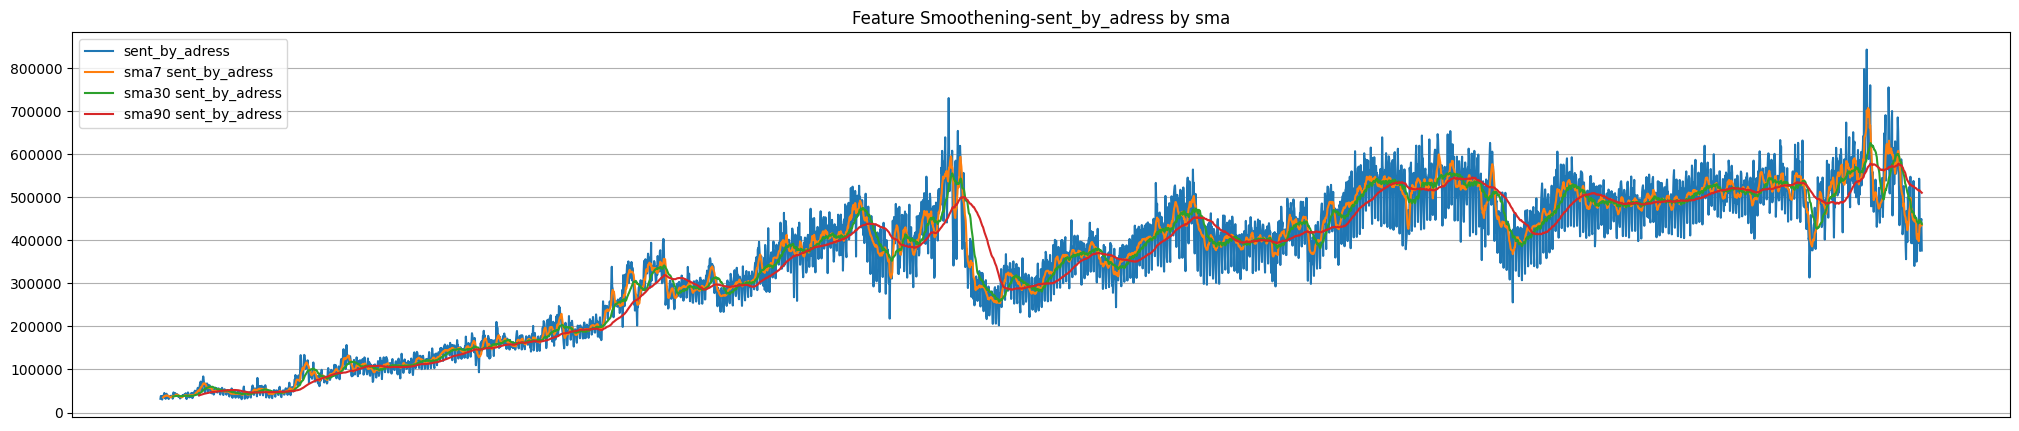

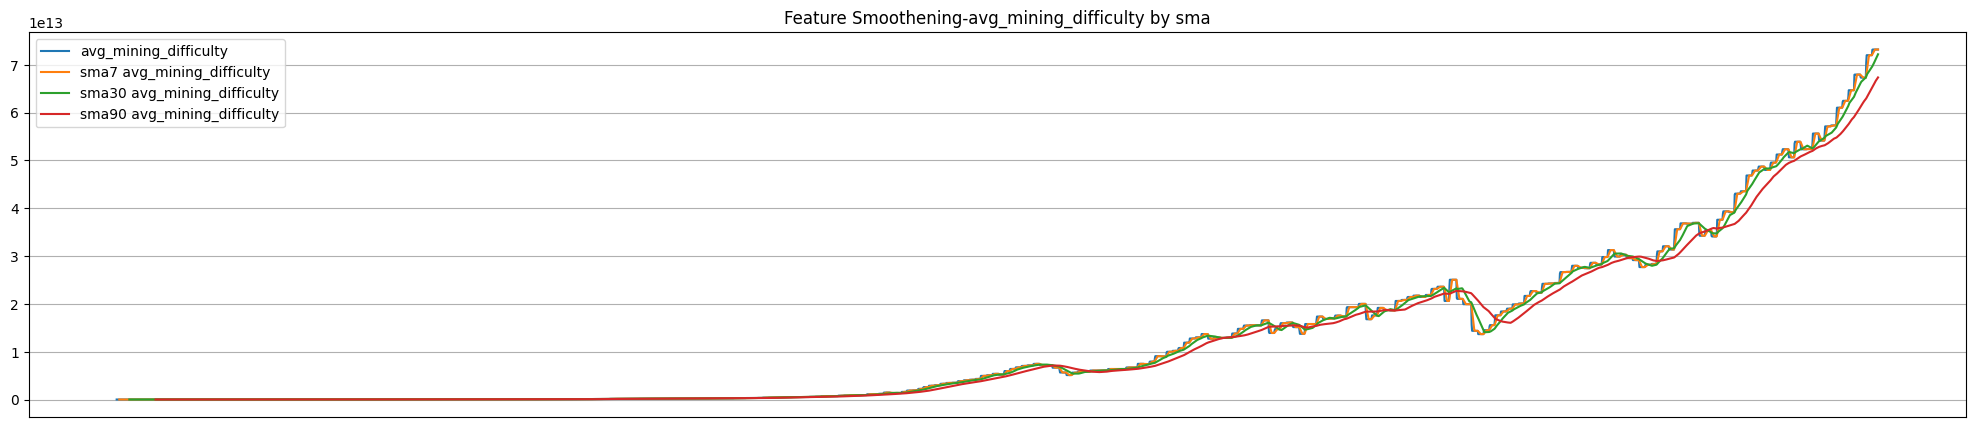

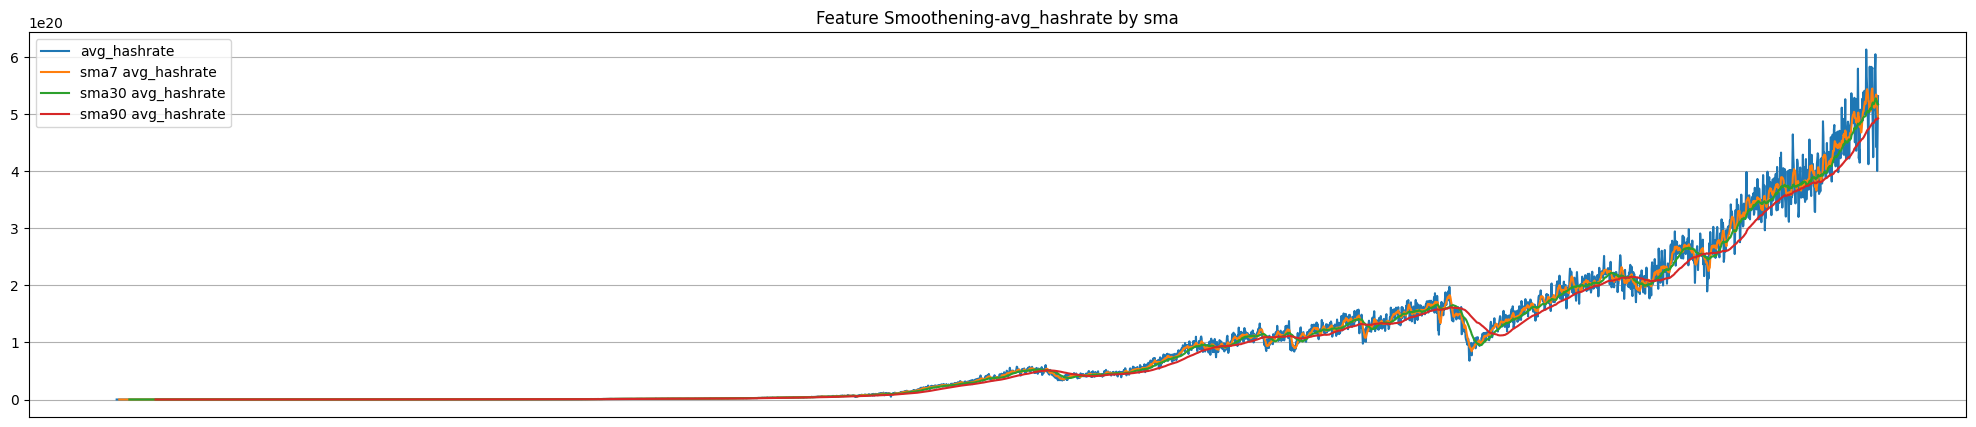

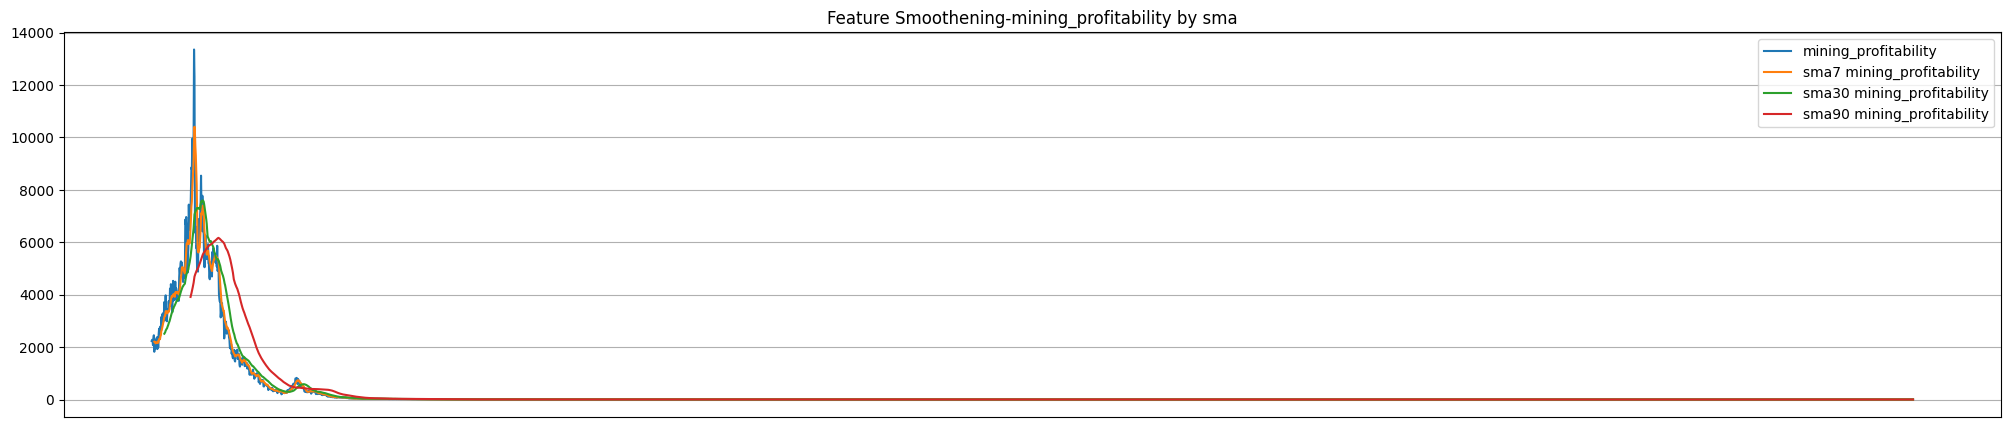

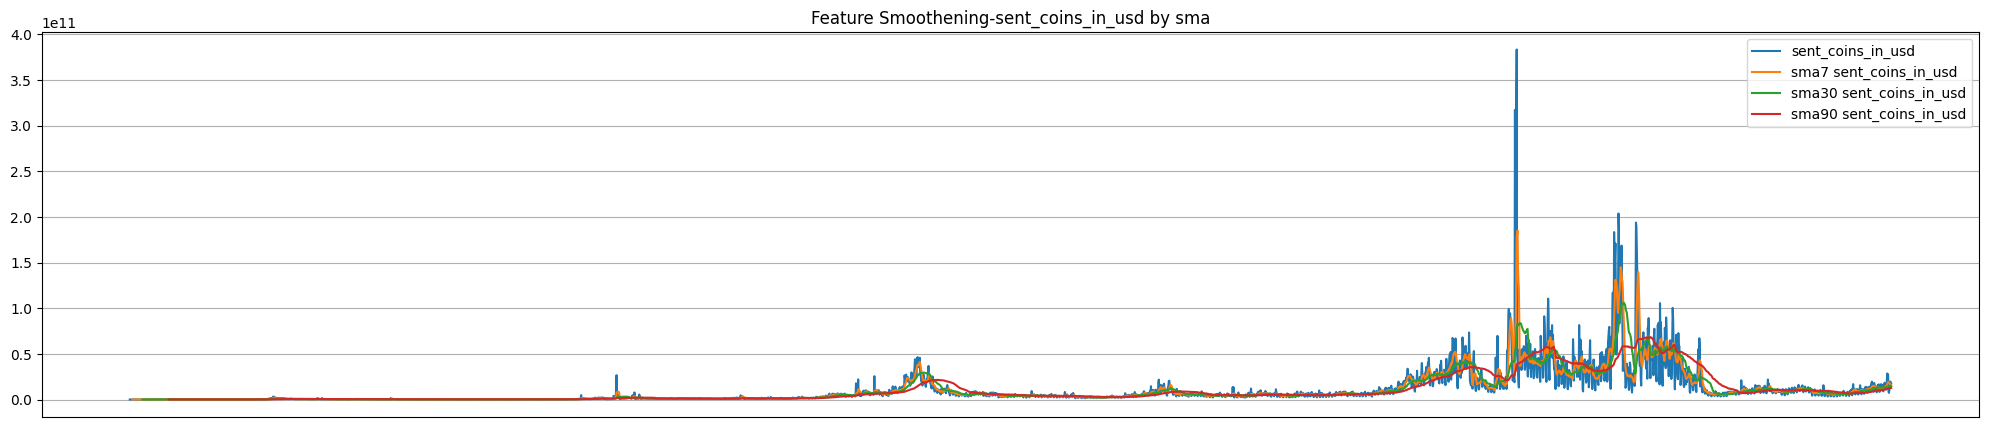

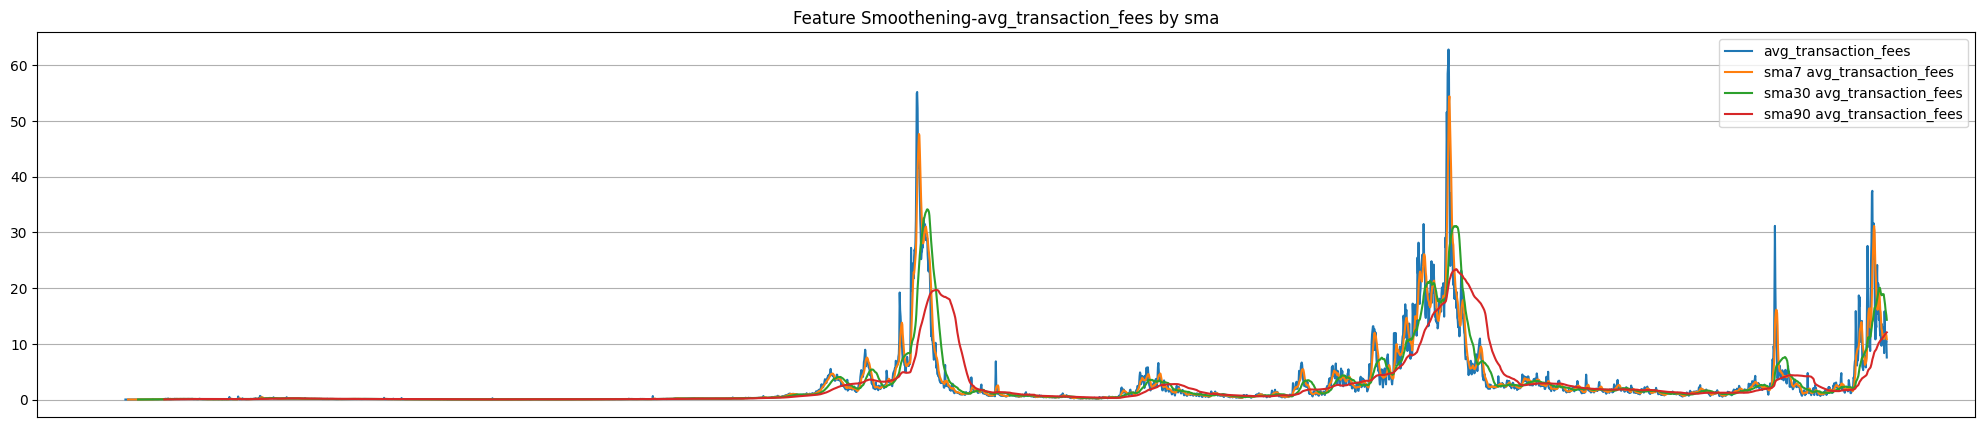

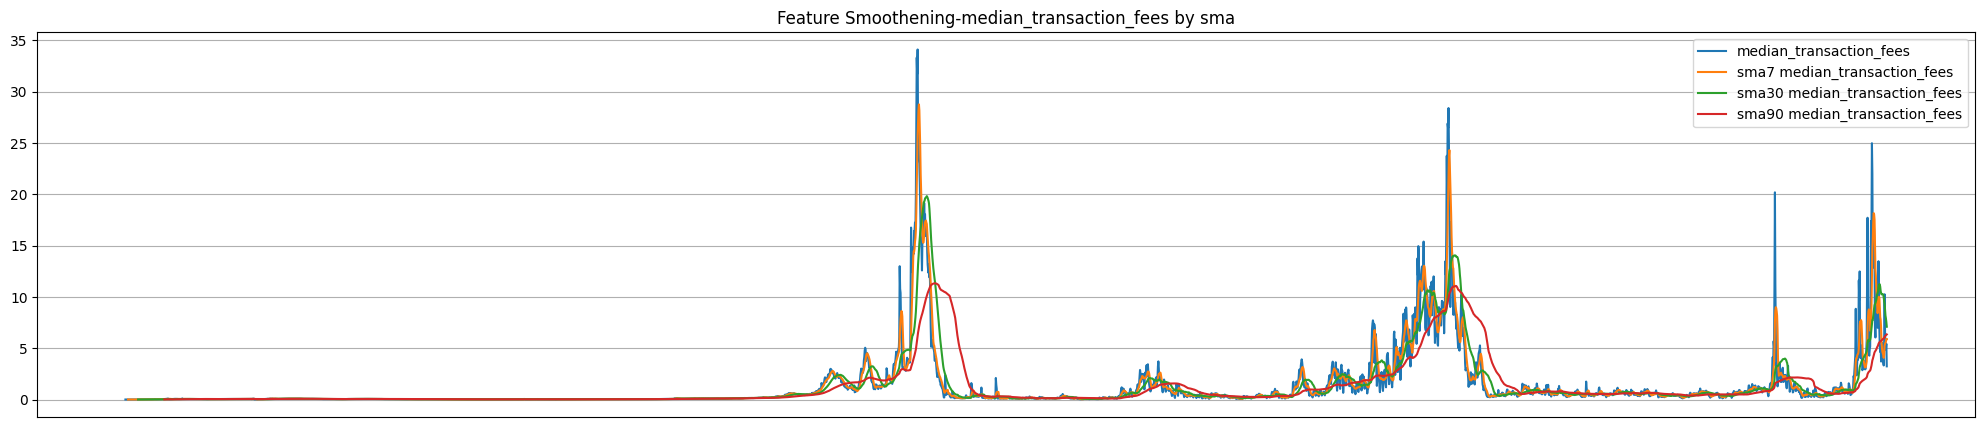

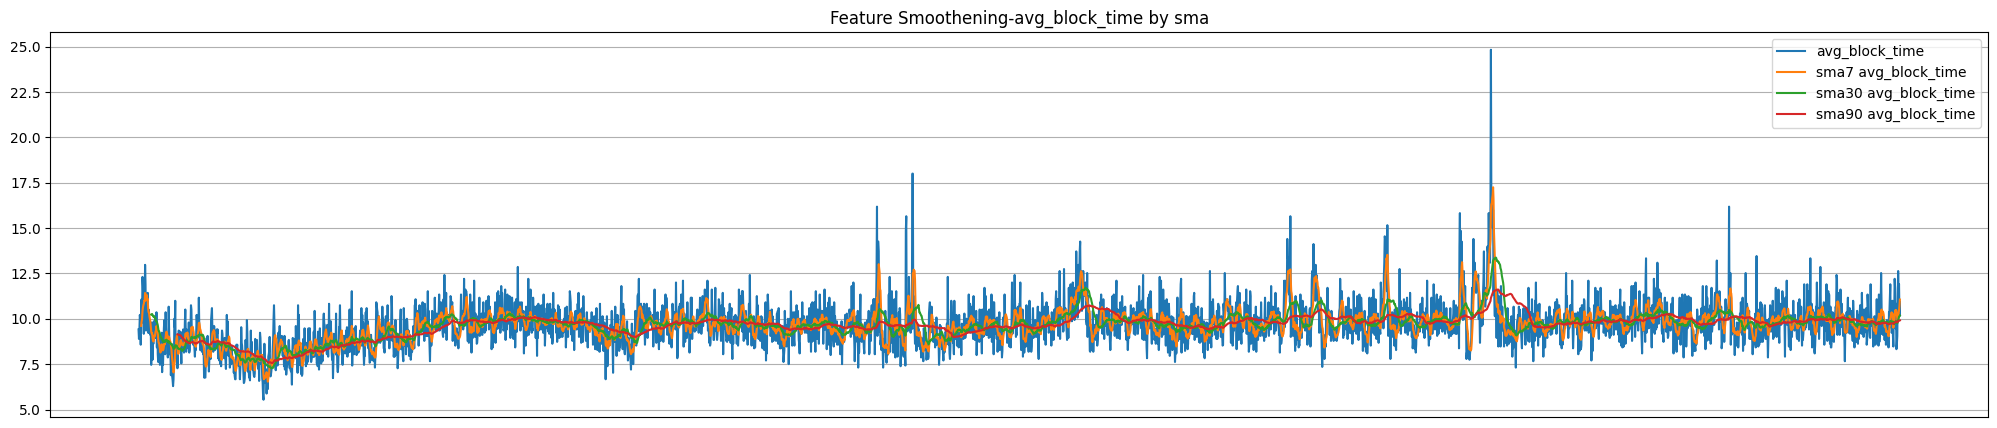

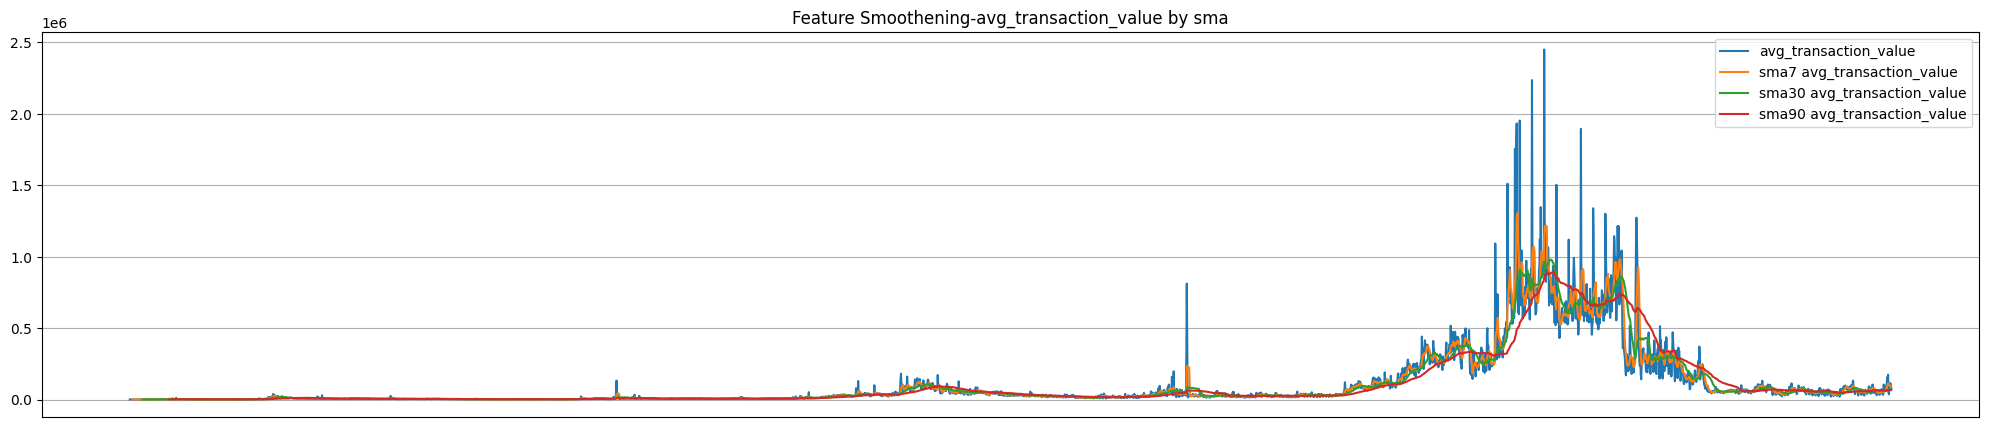

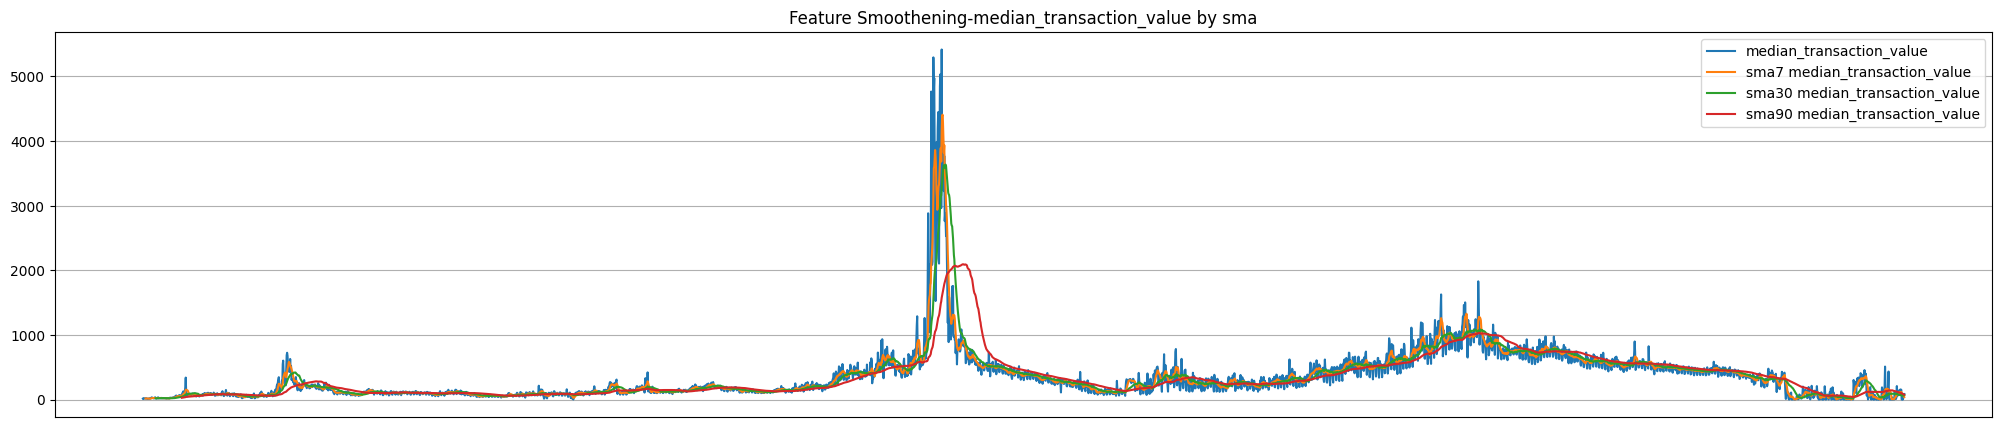

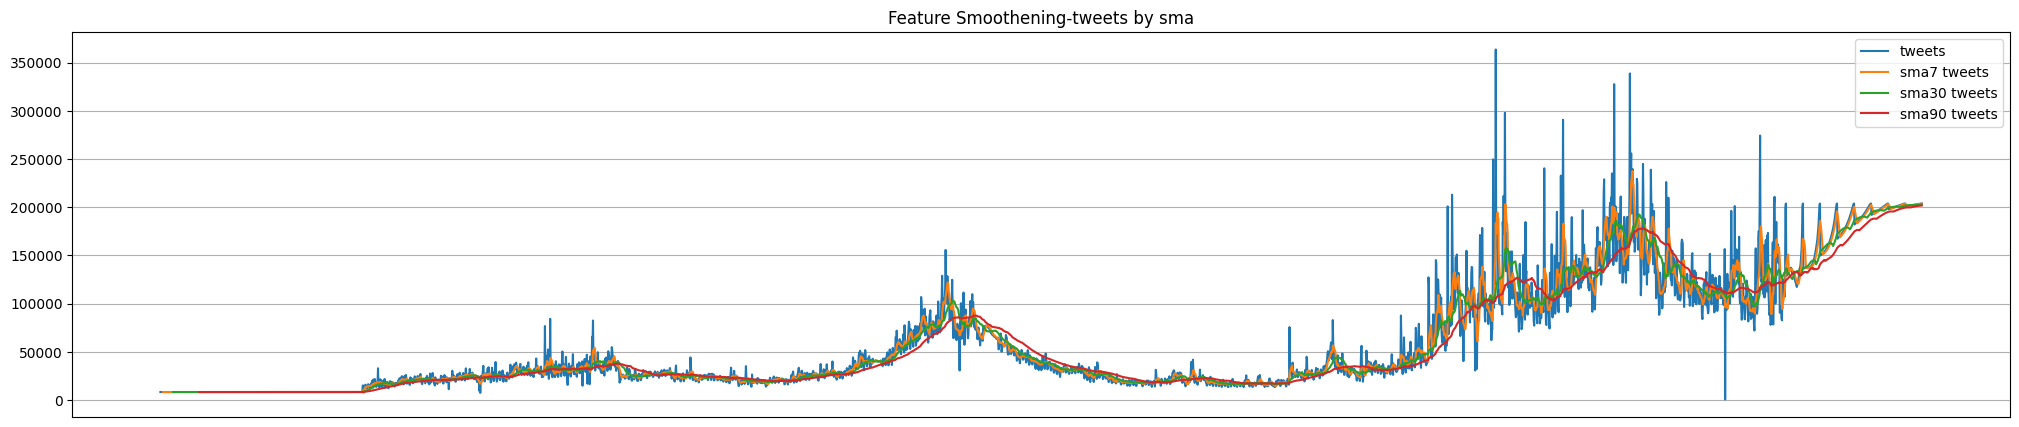

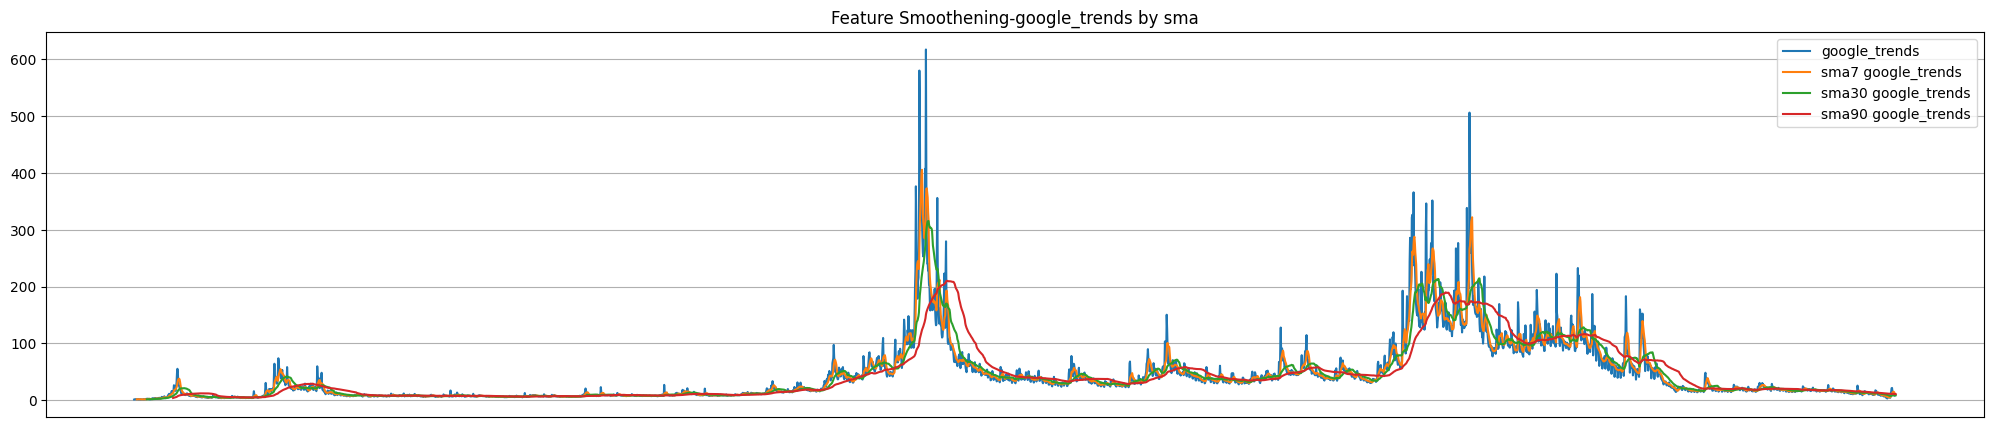

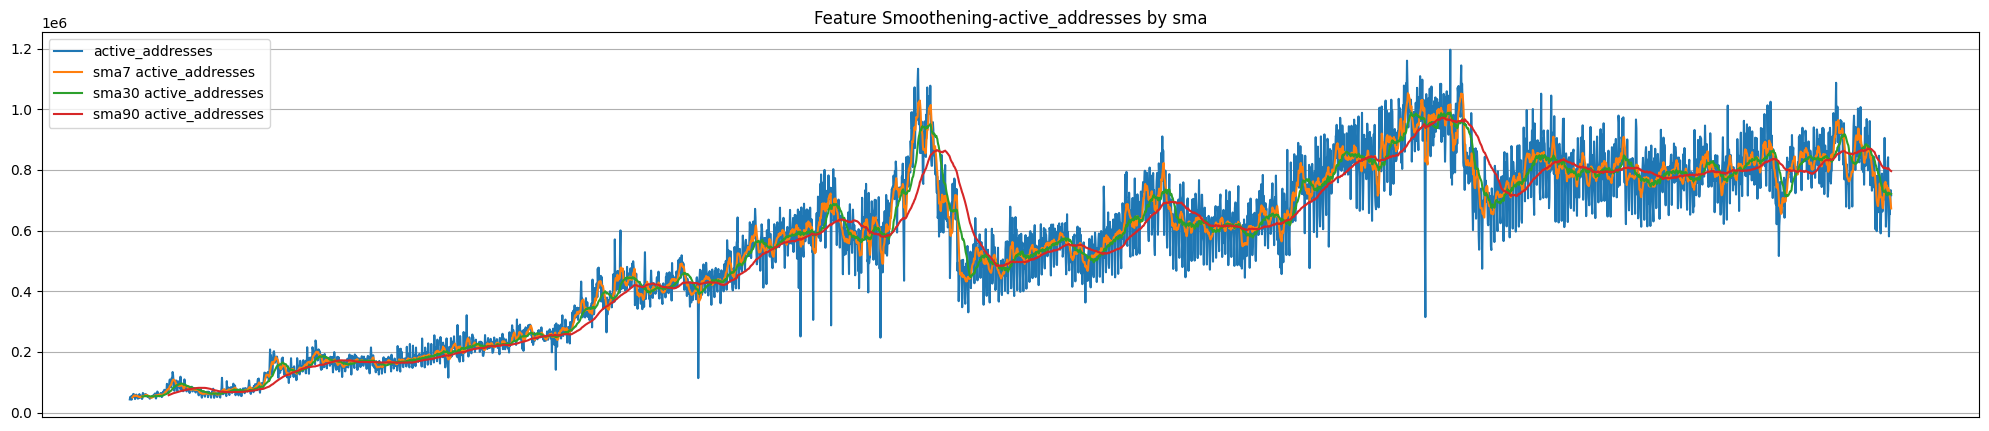

DataError: No numeric types to aggregate

In [9]:
for feature in feature_list:
    feature_smoothening(final_df,feature,'sma',show_plot=True)

Weighted Moving Average
- While calculating average, It assigns a greater weighting to the most recent data points, and less weighting to data points in the distant past.
- SNIMKA OD FORMULATAAA!!!!!!!!!

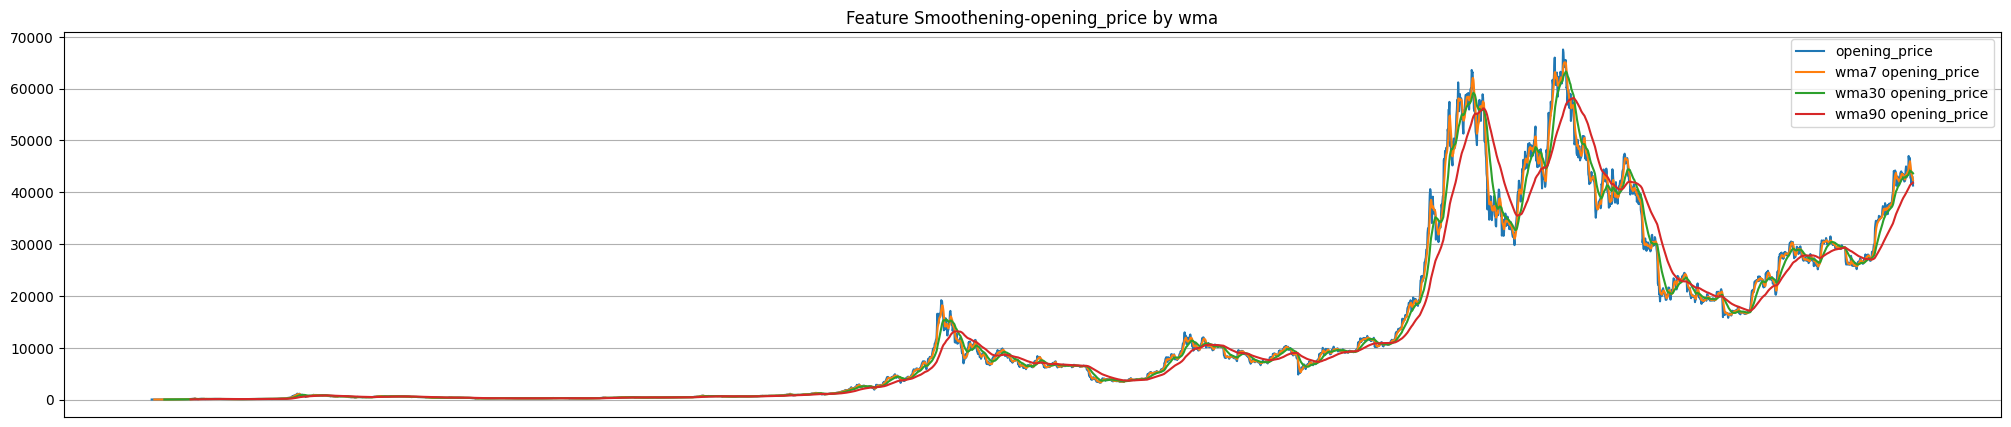

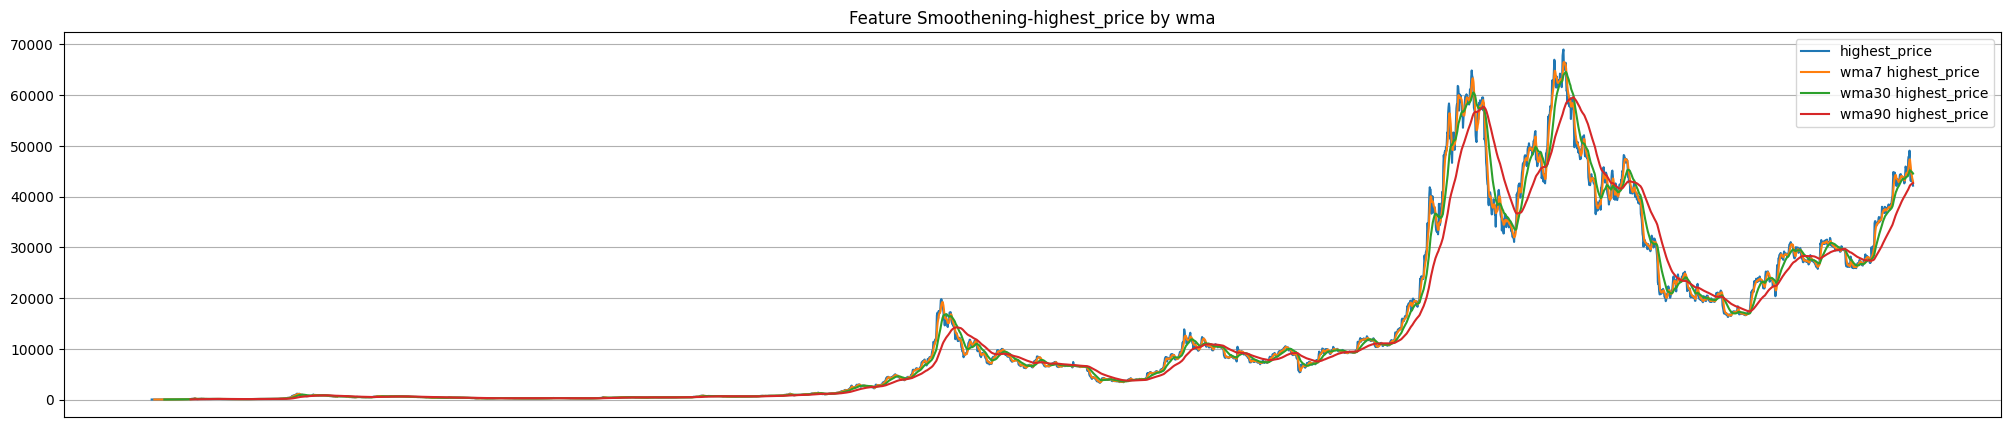

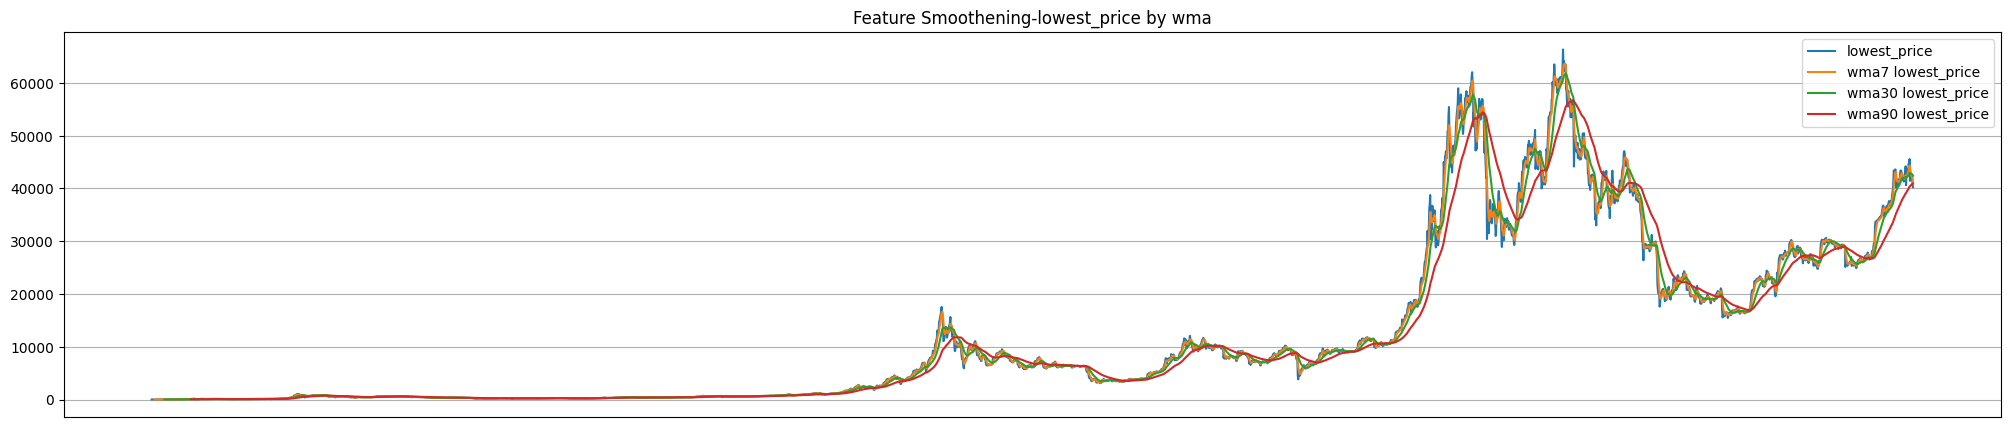

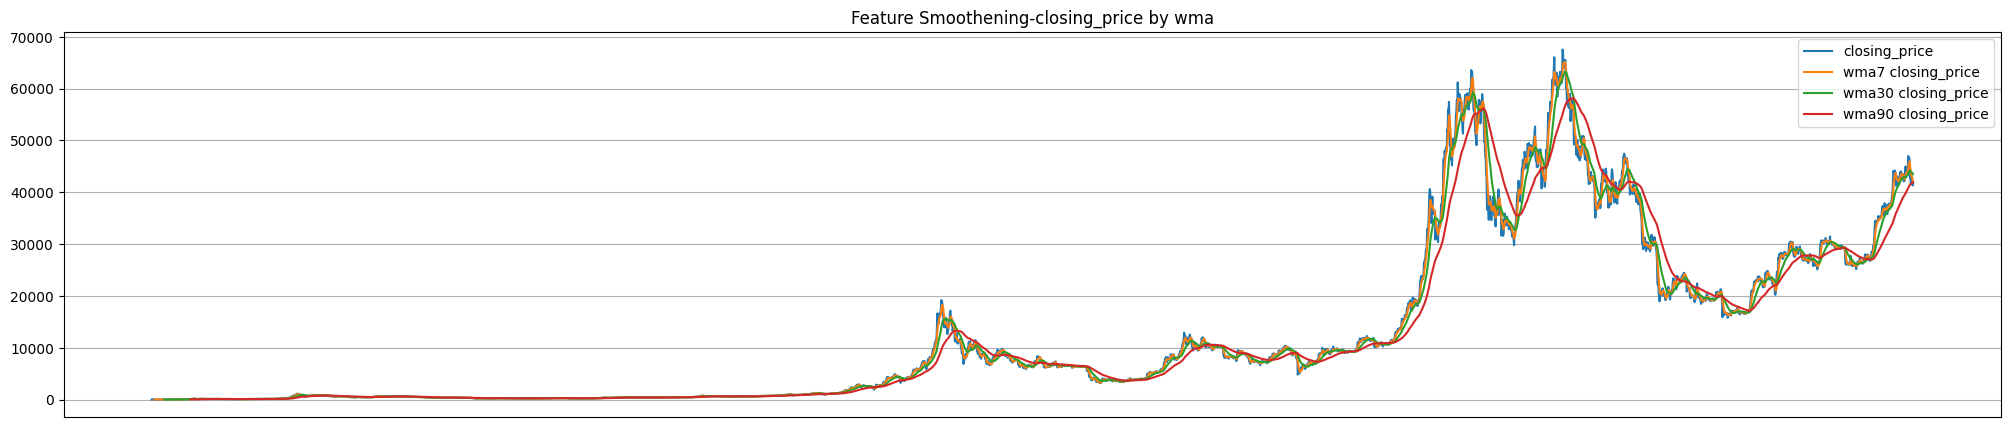

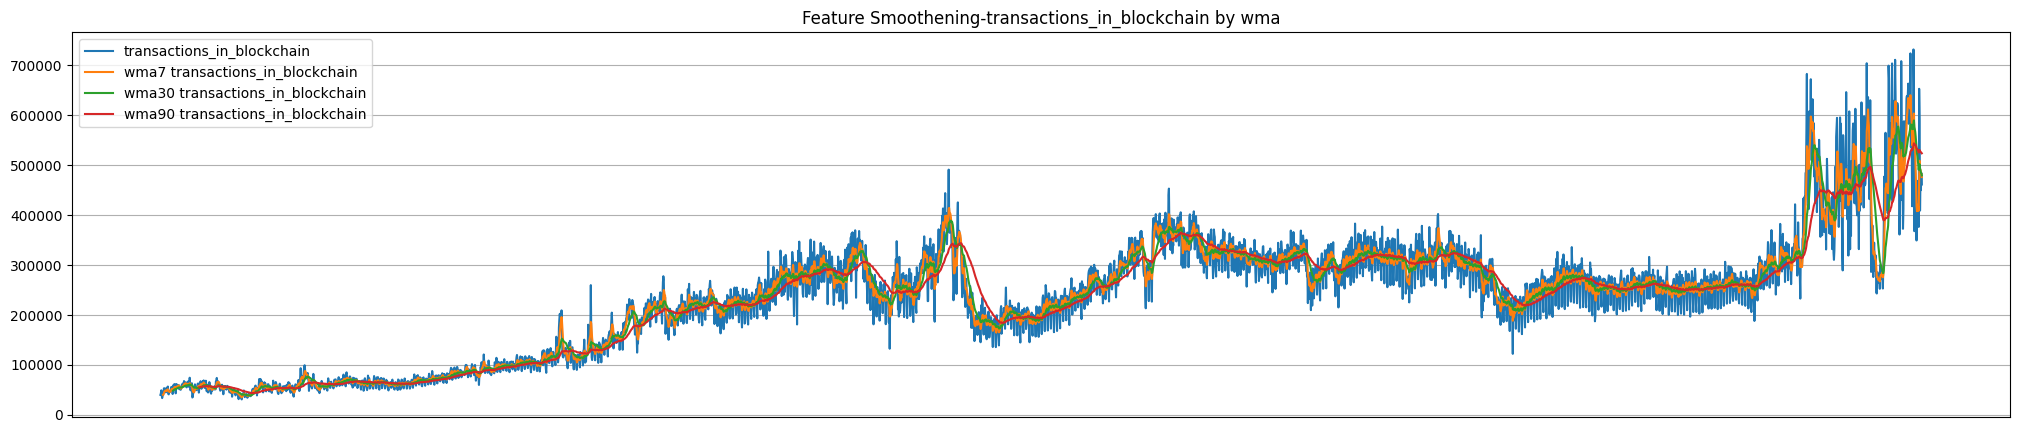

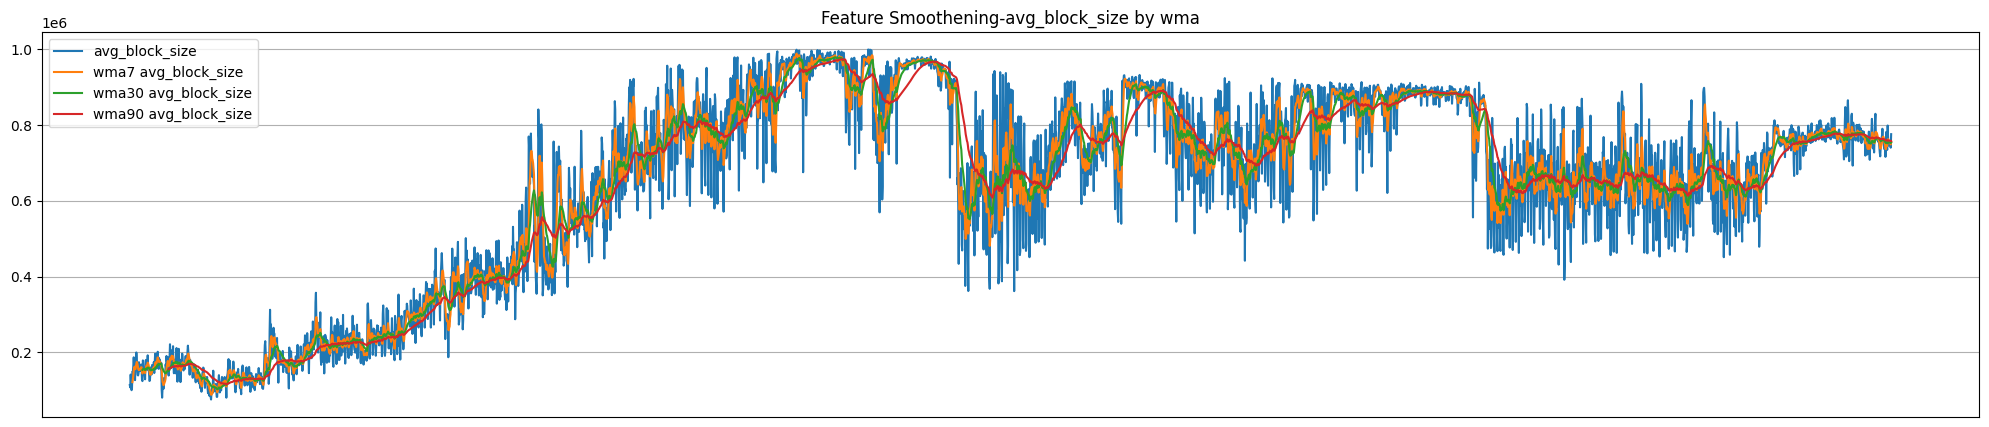

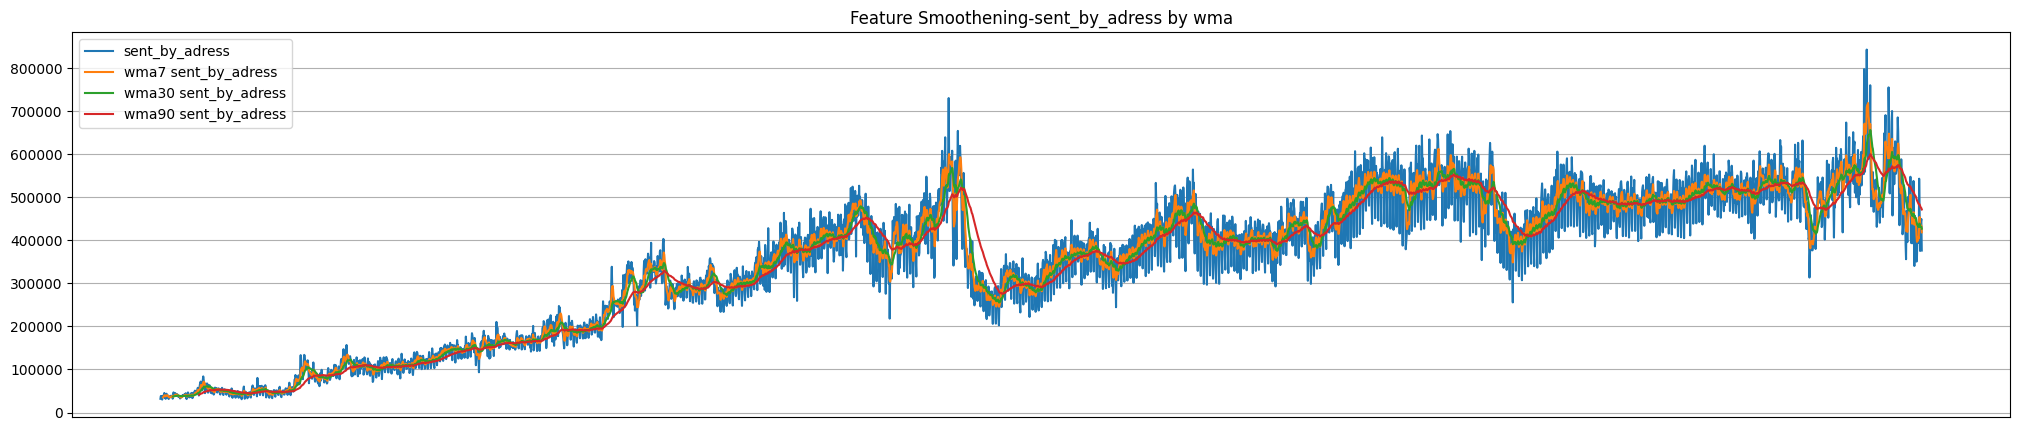

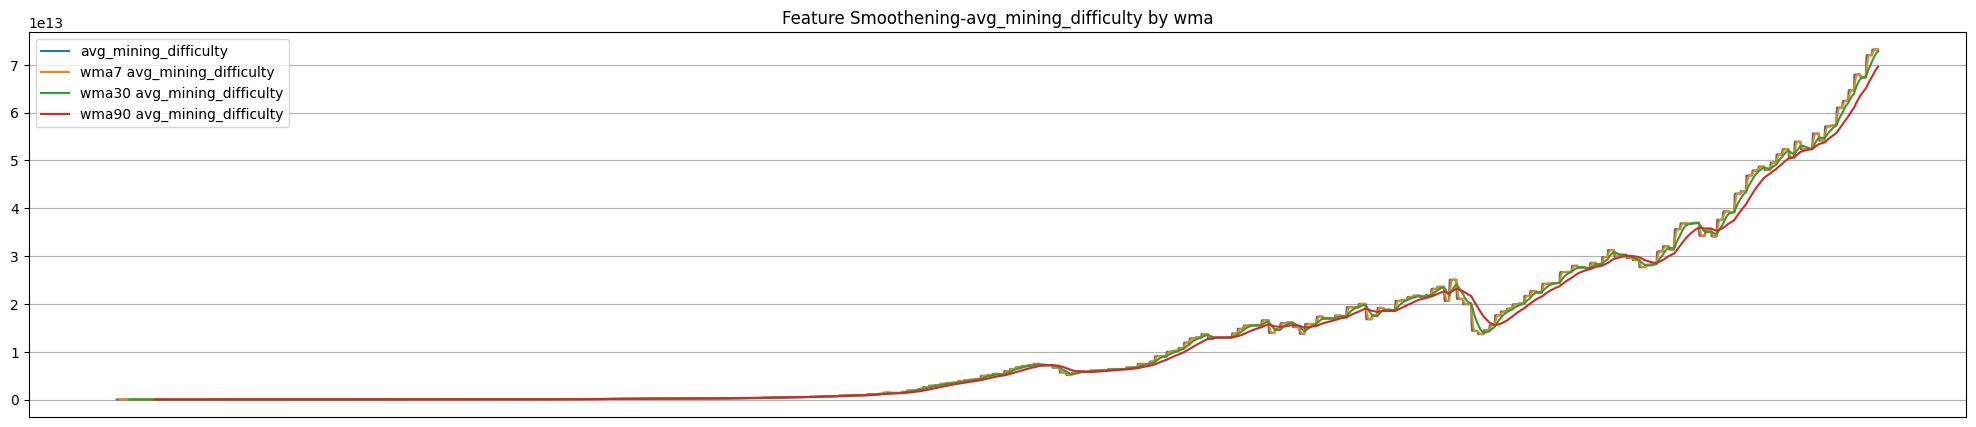

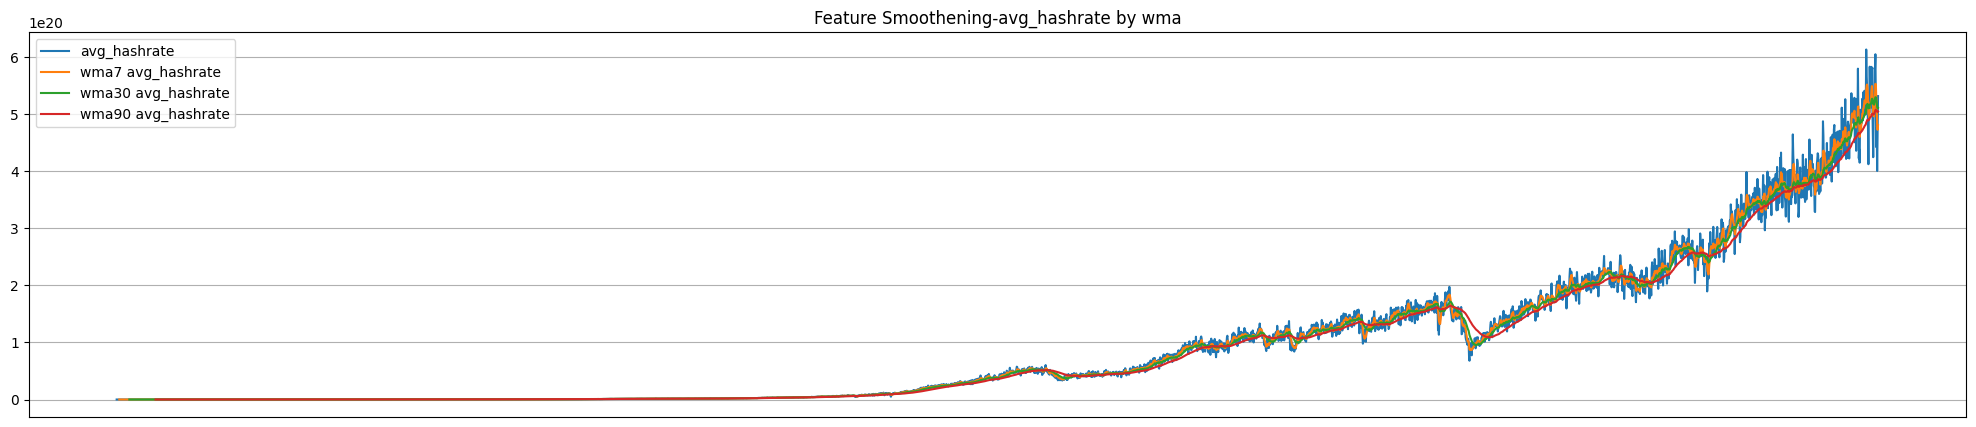

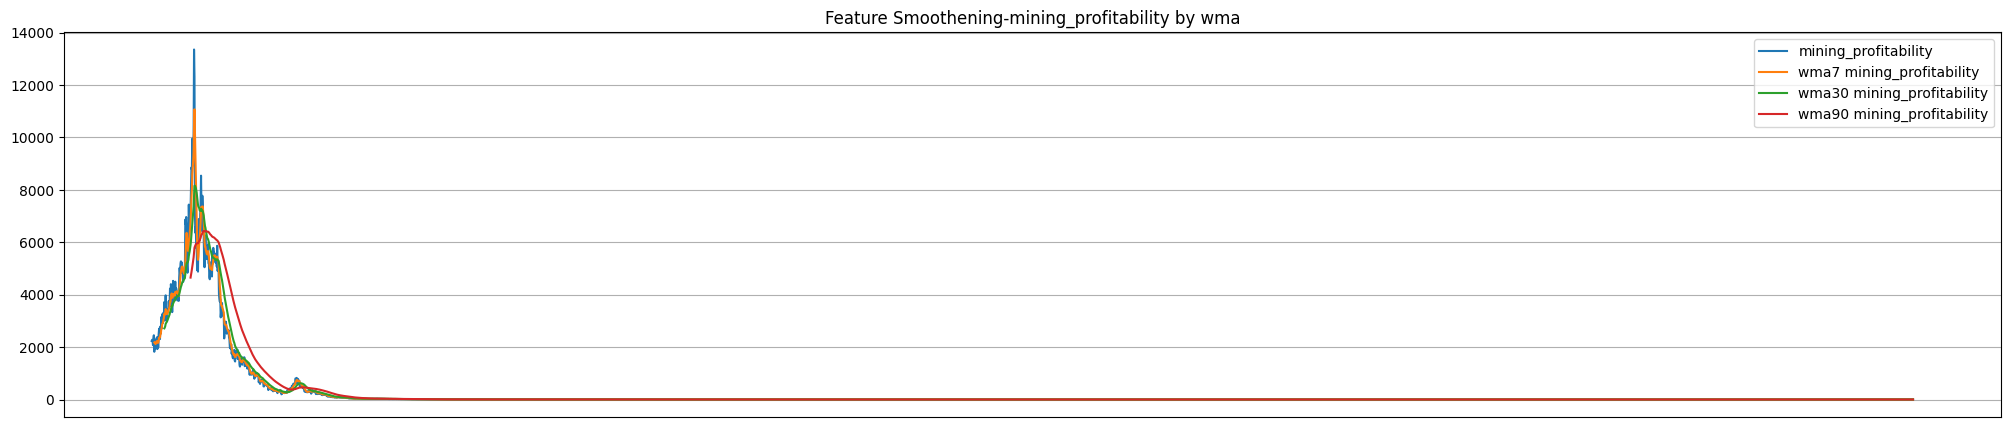

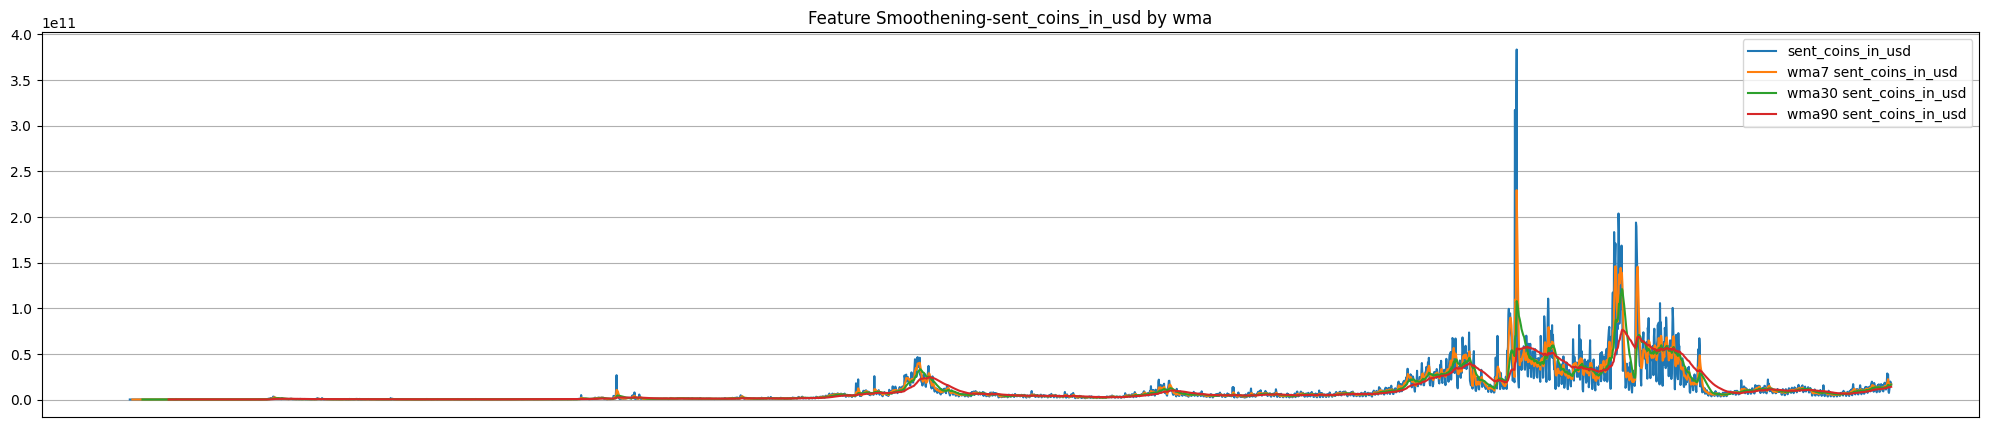

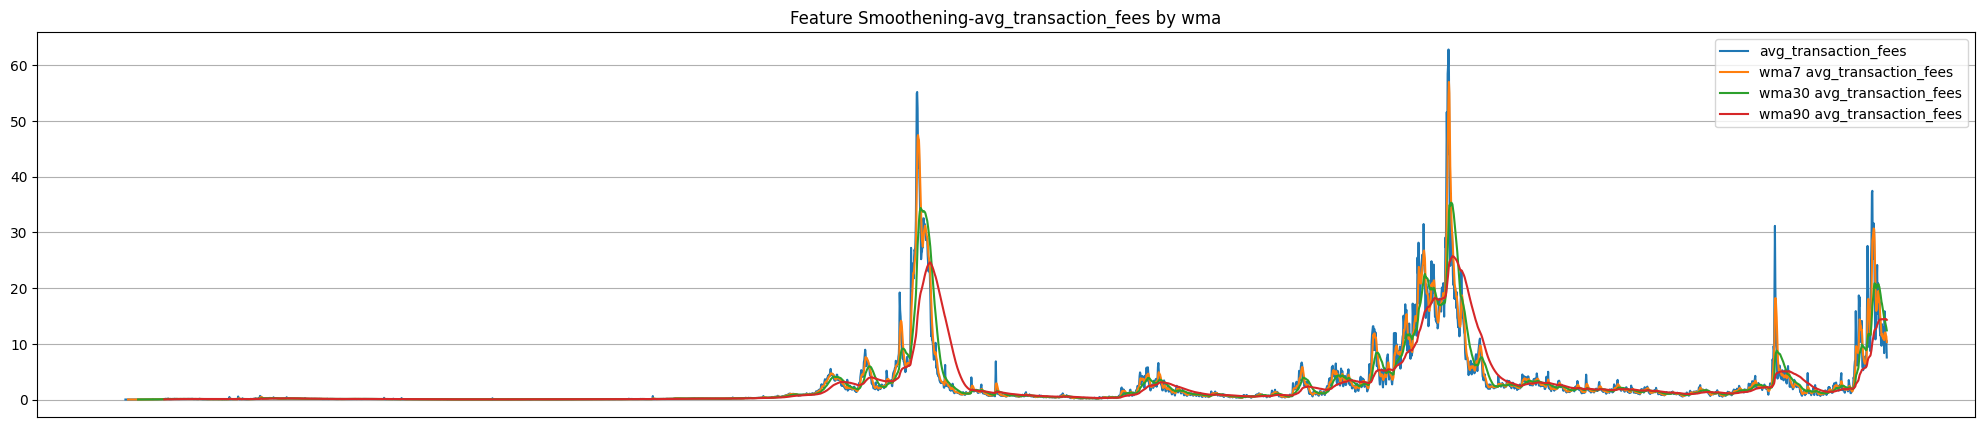

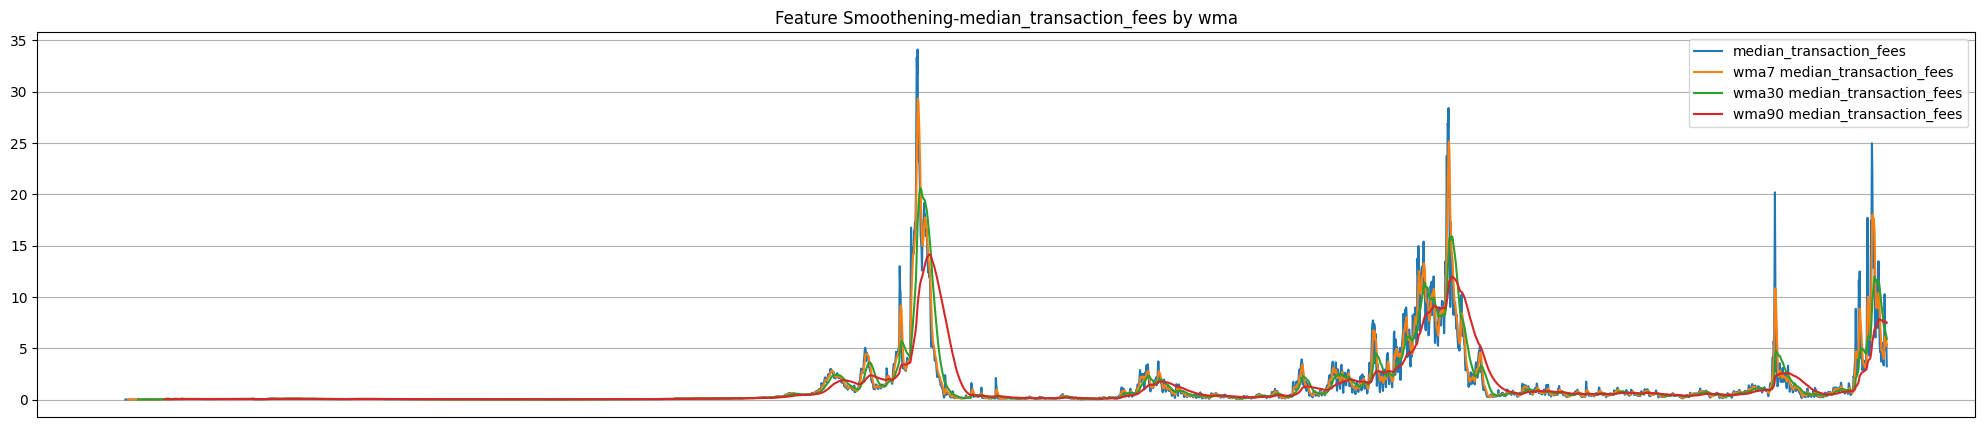

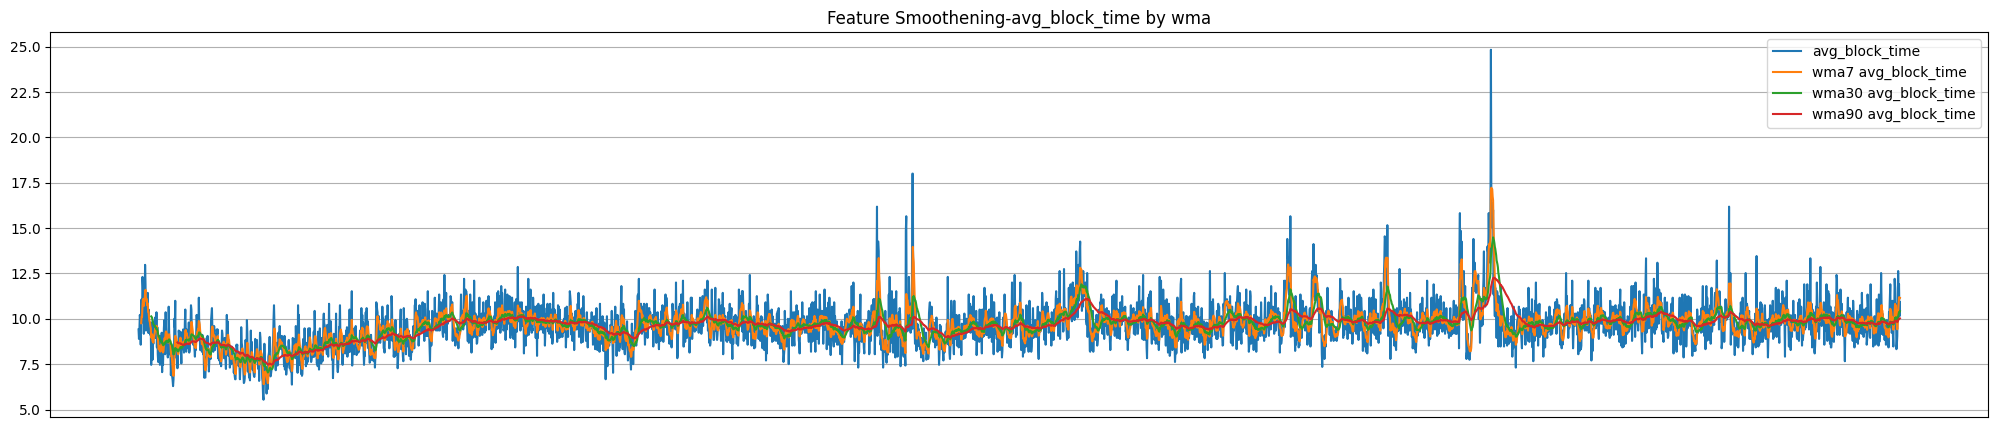

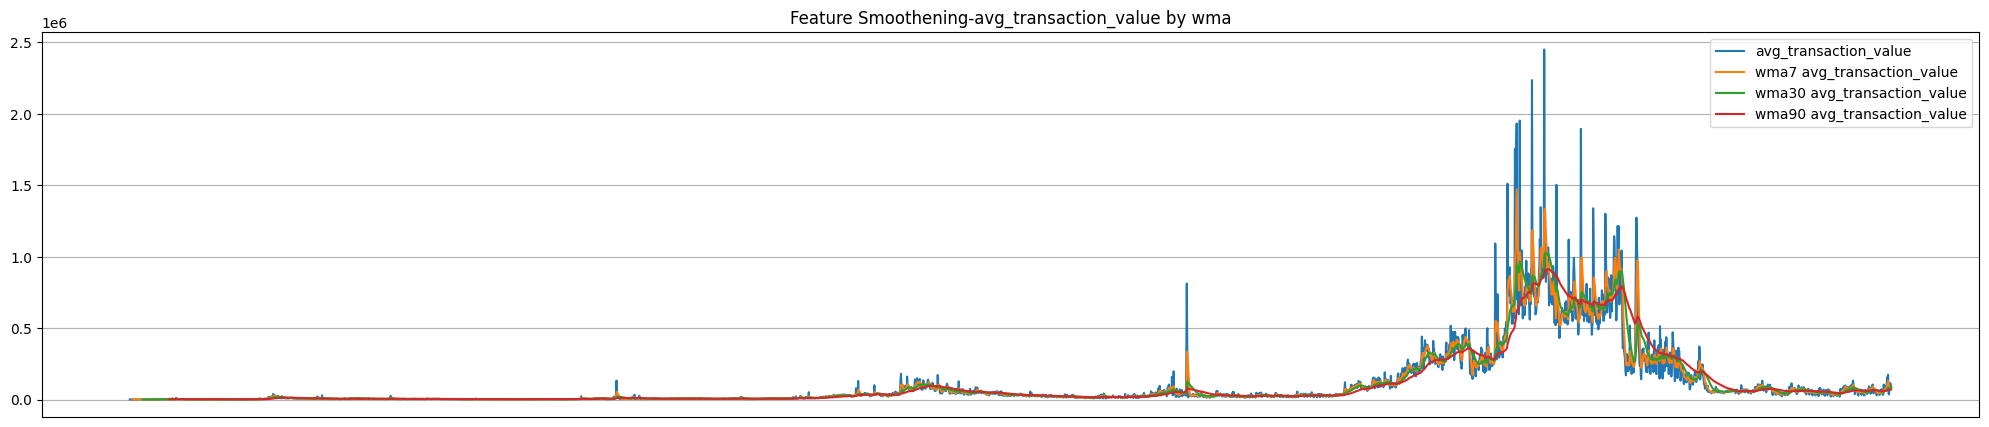

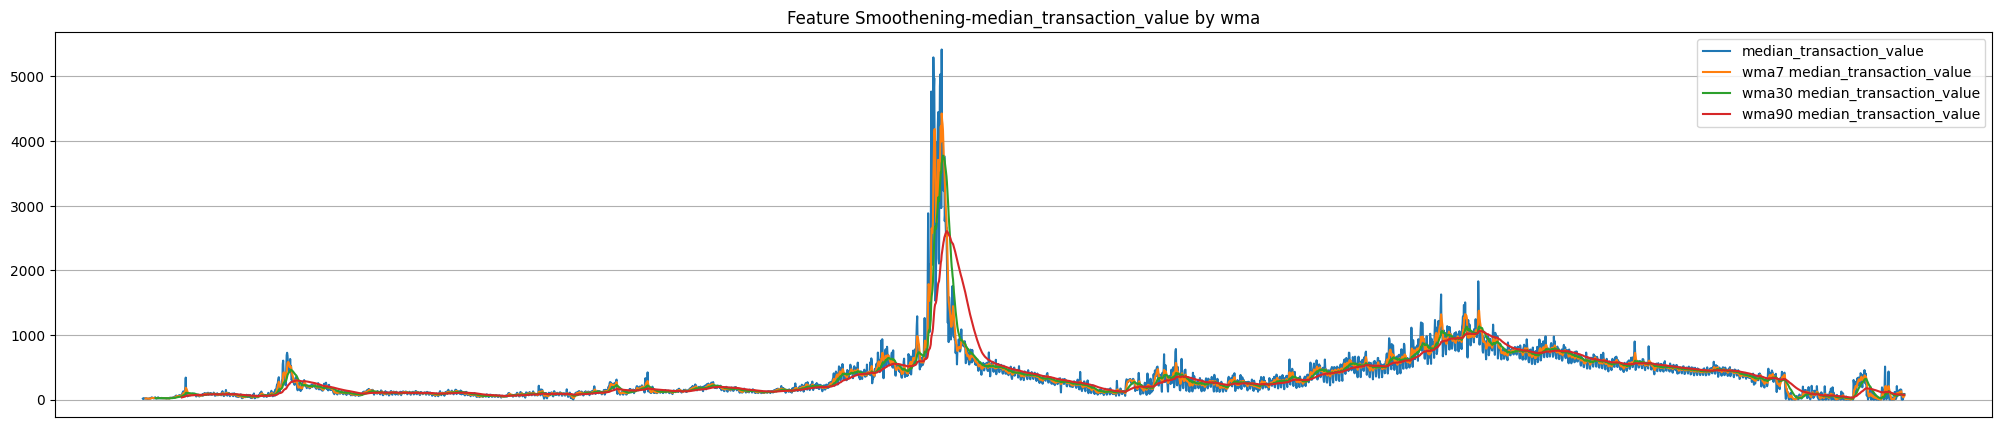

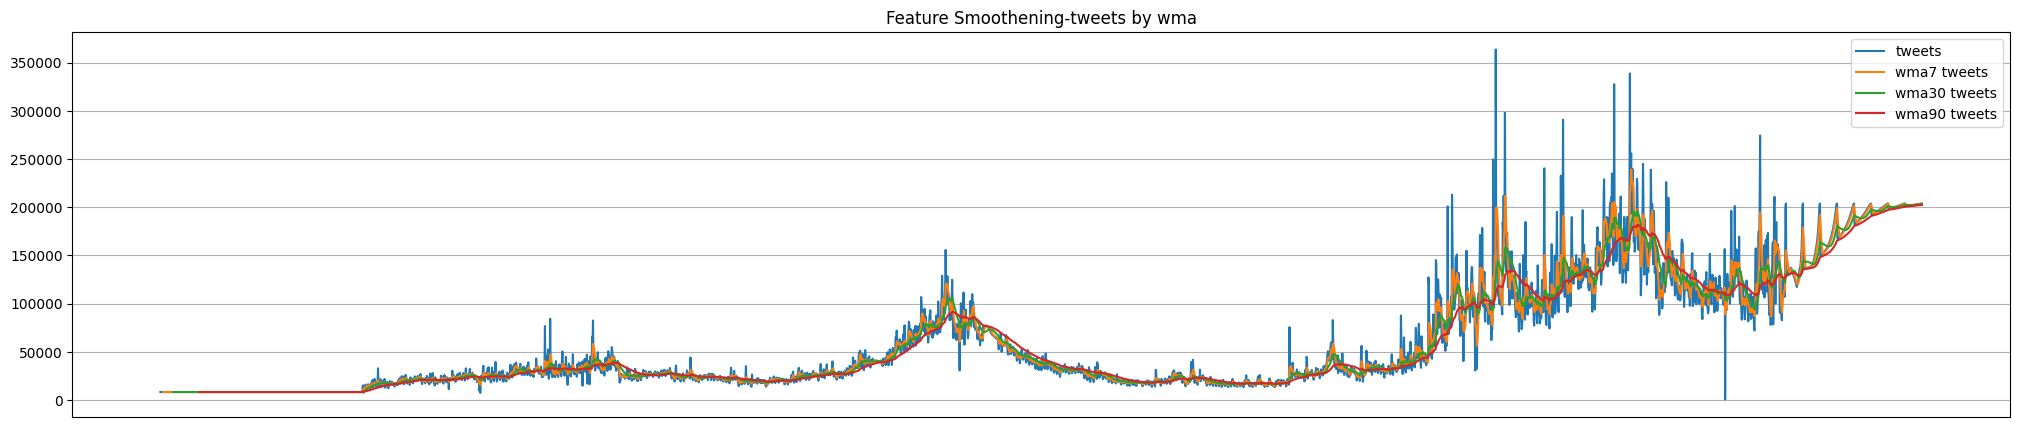

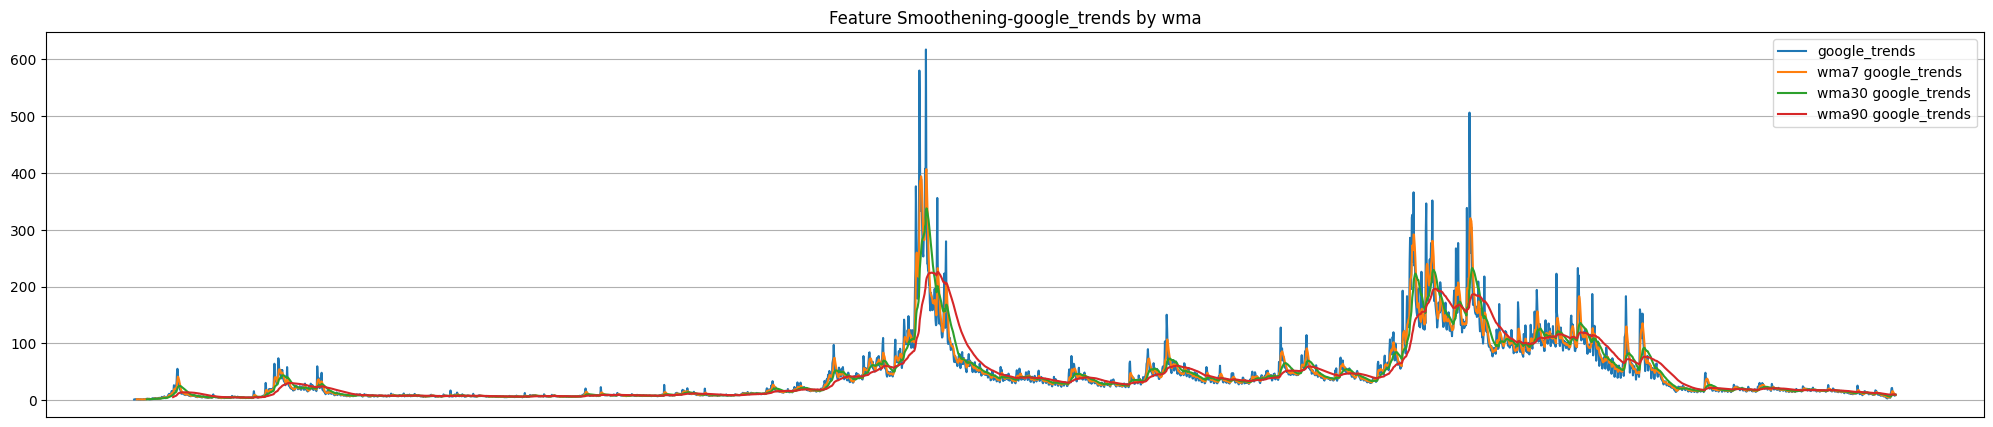

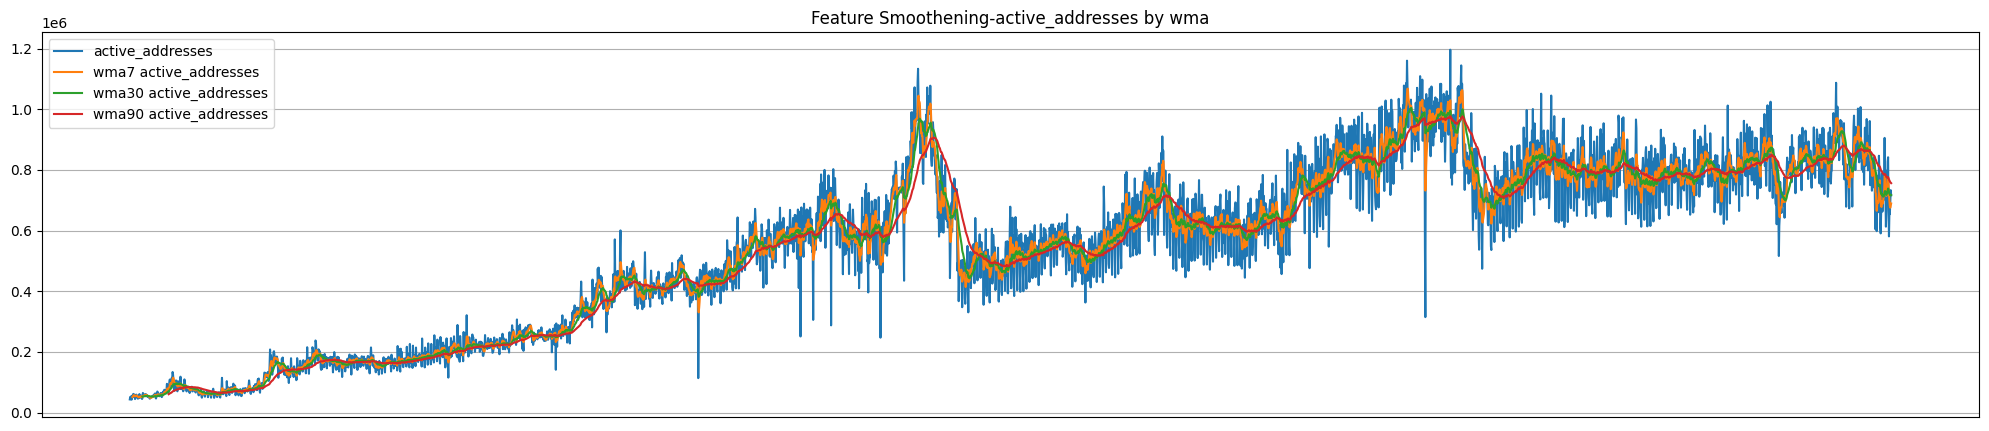

DataError: No numeric types to aggregate

In [10]:
for feature in feature_list:
    feature_smoothening(final_df,feature,'wma',show_plot=True)

Exponential Moving Average
- The EMA is a moving average that places a greater weight and significance on the most recent data points. They work similar to WMA but formula is different.
- SNIMKA OD FORMULATAAAAA!!!!!
- The EMA adapts more quickly to price changes than the SMA does. For example, when a price reverses direction, the EMA will reverse direction more quickly than the SMA will, because the EMA formula gives more weight to recent prices and less weight to prices from the past.

In [ ]:
for feature in feature_list:
    feature_smoothening(final_df,feature,'ema',show_plot=True)

Double Exponential Moving Average
- DEMA responds more quickly to near-term price changes than a normal exponential moving average (EMA).
- SNIMKAAAA!!!
- It helps to filter out noise

In [ ]:
for feature in feature_list:
    feature_smoothening(final_df,feature,'dema',show_plot=True)

Triple Exponential Moving Average
- It uses multiple EMA calculations and subtracts the lag to create a trend following indicator that reacts quickly to price changes.
- SNIMKAAA!!!!
- The TEMA reacts to price changes quicker than a traditional MA or EMA will. This is because some of the lag has been subtracted out in the calculation.

In [ ]:
for feature in feature_list:
    feature_smoothening(final_df,feature,'tema',show_plot=True)

Standard Deviation
- Standard deviation is the statistical measure of market volatility, measuring how widely feature values are dispersed from the average feature values.
- If feature values trade in a narrow trading range, the standard deviation will return a low value that indicates low volatility.
Conversely, if feature values swing wildly up and down, then standard deviation returns a high value that indicates high volatility.

In [ ]:
for feature in feature_list:
    feature_smoothening(final_df,feature,'stdev',show_plot=True)

Variance
- Variance is another statistical measure of market volatility, measuring how widely feature values are dispersed from the average feature values.
- It is interpreted similar to standard deviation as varaince is square of standadrd deviation

In [ ]:
for feature in feature_list:
    feature_smoothening(final_df,feature,'var',show_plot=True)

Relative Strength Index
- RSI = 100 – 100 / (1 + RS)
- RS = Average of X periods closes up / Average of X periods closes down
- An asset is considered oversold or undervalued when the RSI drops below 30. On the other hand, it's deemed to be overbought if the RSI goes above 70.

In [ ]:
for feature in feature_list:
    feature_smoothening(final_df,feature,'rsi',show_plot=True,show_original_Feature_in_plot=False)

Rate of Change
- Measures the percentage change in price between the current feature value and the feature a certain number of periods ago.e.g., 7,30,90
- A rising ROC above zero typically confirms an uptrend while a falling ROC below zero indicates a downtrend.

In [ ]:
for feature in feature_list:
    feature_smoothening(final_df,feature,'roc',show_plot=True,show_original_Feature_in_plot=False)

Bollinger Bands
- Bollinger Bands are envelopes (Upper and Lower range levels) plotted at a standard deviation level above and below a simple moving average of the price. Because the distance of the bands is based on standard deviation, they adjust to volatility swings in the underlying price.

- Upper band: n-day SMA + (n-day standard deviation x2)
- Lower band: n-day SMA – (n-day standard deviation x2)

- Bollinger bands help determine whether values are high or low on a relative basis. They are used in pairs, both upper and lower bands and in conjunction with a moving average. Further, the pair of bands is not intended to be used on its own. Use the pair to confirm signals given with other indicators.

In [ ]:
for feature in feature_list:
    feature_smoothening(final_df,feature,'bband_lower',show_plot=True)

In [ ]:
for feature in feature_list:
    if feature not in ['Date','weekday', 'year', 'month','7th_day_avg_price','30th_day_avg_price','90th_day_avg_price','avg_btc_price']:
        feature_smoothening(final_df,feature,'bband_upper',show_plot=True)

Moving Average Convergence Divergence
- The MACD represents a trend following indicator that highlights whether the short-term price momentum is moving in the same direction as the long-term price momentum, and in cases where it's not, then it's used to determine if a trend change is near. The MACD consists of four components.
- MACD line-shows the variation between the slow moving average and the fast-moving average
- Signal line-for signaling fluctuations in price momentum
- Histogram-indicates the difference between the signal line and the MACD line.

In [ ]:
for feature in feature_list:
    feature_smoothening(final_df,feature,'macd',show_plot=True,show_original_Feature_in_plot=False)

Final Processing and saving file

In [ ]:
final_df = final_df[(final_df['Date'] >= '2013-04-01')].fillna(method='bfill')

In [ ]:
final_df.shape

In [ ]:
#final_df.to_csv('/content/drive/MyDrive/Self Case studies/CS01 Bitcoin Price Forecasting/Data/02 Feature Engineered Data/final_data_after_feat_engg_20210909.csv')
     